In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('house1.csv')
test=pd.read_csv('house2.csv')

## Exploratory Data Analysis

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
train.shape

(1460, 81)

In [6]:
# Train data has one columns extra [Target varible="Sales Price"]
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.isnull().sum().sort_values(ascending=True)

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [23]:
# Lets Look on Test Data
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [24]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [25]:
test.shape

(1459, 80)

In [26]:
test.isnull().sum().sort_values(ascending=False)

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Foundation        0
Id                0
Length: 80, dtype: int64

In [27]:
train['DataType']='Train'
test['DataType']='Test'

In [28]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DataType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Train
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Train
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Train
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Train


In [14]:
# Id feature can be dropped
len(train.Id)

1460

In [29]:
numericaldata=train.select_dtypes(include='number')
objectdata=train.select_dtypes(include='object')

## Numerical Variable

In [30]:
numericaldata

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


## Datatime  Variables

In [31]:
# There are 4 variables (YearBuilt,YearRemodAdd,YrSold)
year_feature=[feature for feature in numericaldata if 'Year' in feature or 'Yr' in feature ]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [32]:

#numericaldata['YearRemodAdd']=2021-numericaldata.YearRemodAdd
#numericaldata['GarageYrBlt']=2021-numericaldata.GarageYrBlt

In [21]:
#numericaldata['YearBuilt']=2021-numericaldata.loc[:,'YearBuilt']


In [22]:
#numericaldata['YrSold']=2021-numericaldata.YrSold

<AxesSubplot:xlabel='YrSold'>

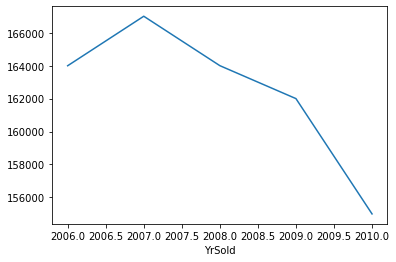

In [22]:
# Lets check is there realtionship between the Yearsold and Saleprice
numericaldata.groupby('YrSold')['SalePrice'].median().plot()

#### The sales price decreases as the number of year sold increases

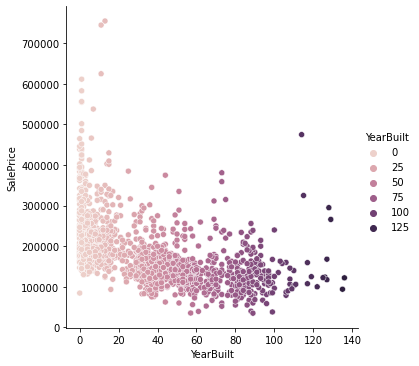

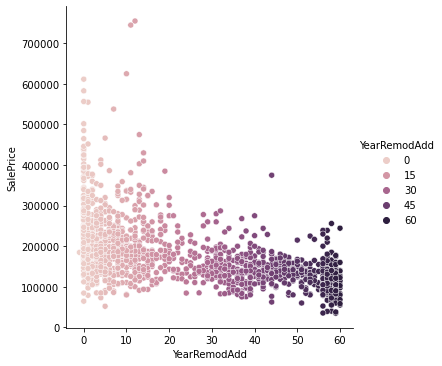

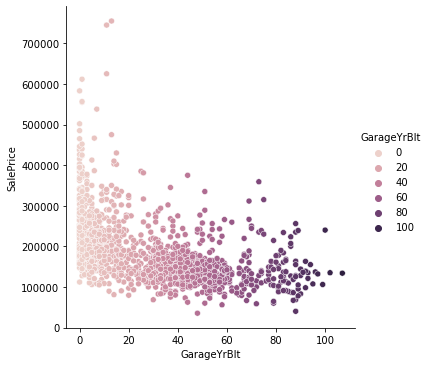

In [21]:
for feature in year_feature:
    if feature!='YrSold':
        data=numericaldata.copy()
        data[feature]=data['YrSold']-data[feature]
        sns.relplot(x=data[feature],y=data['SalePrice'],kind='scatter',hue=data[feature])
          

### The Numerical  Data can be split into Continous and Discrete

## Discrete Data

In [33]:
discrete_data=[discrete for discrete in numericaldata.columns if len(numericaldata[discrete].unique())<25 and discrete not in year_feature and ['Id']] 
print(discrete_data)
print("\nThe number of Discrete features in the numerical data is {}".format(len(discrete_data)) )

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']

The number of Discrete features in the numerical data is 17


In [23]:
# Lets see the relationship between Discrete data and Saleprice

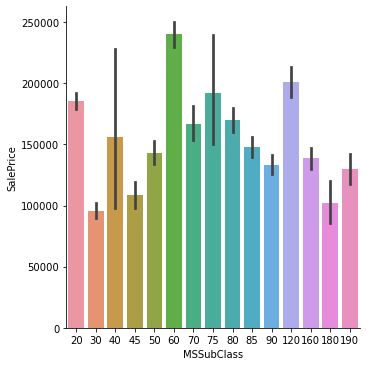

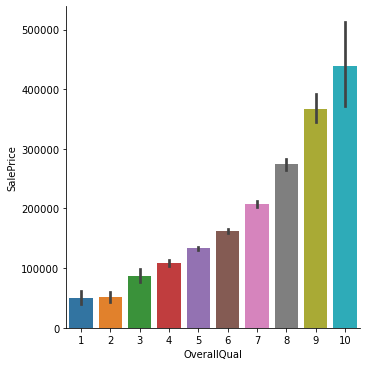

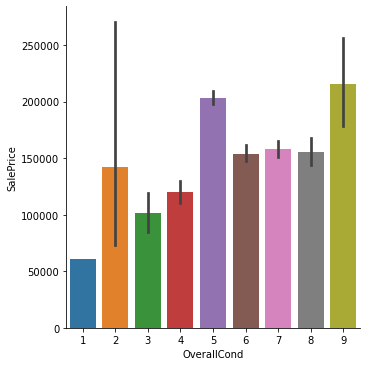

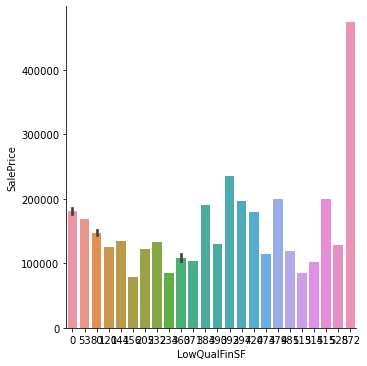

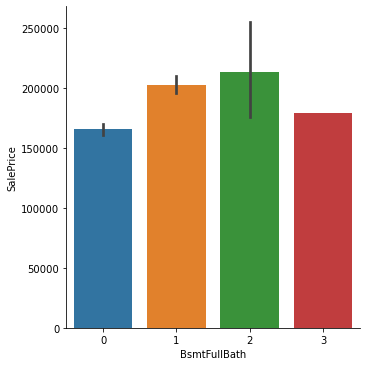

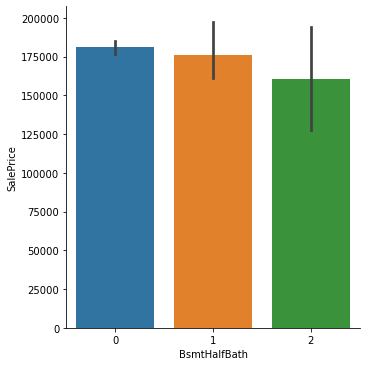

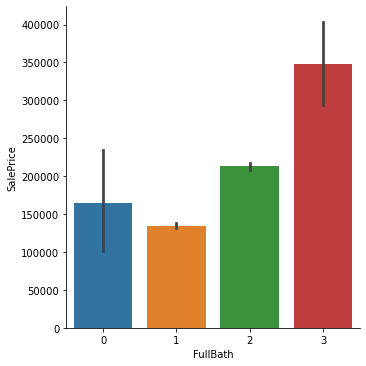

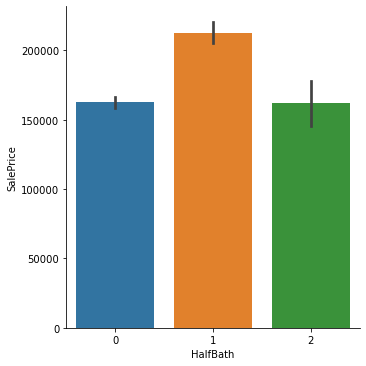

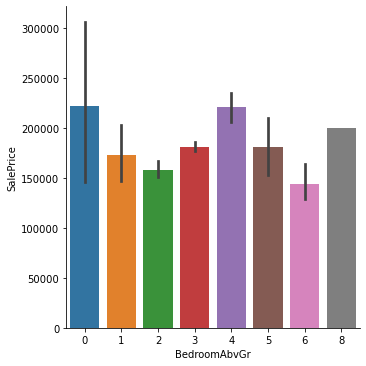

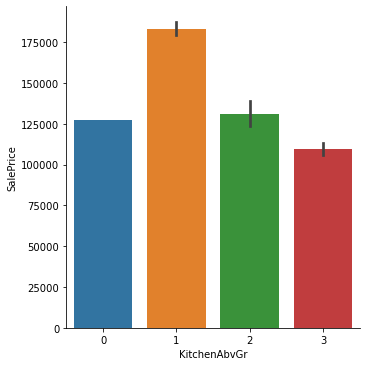

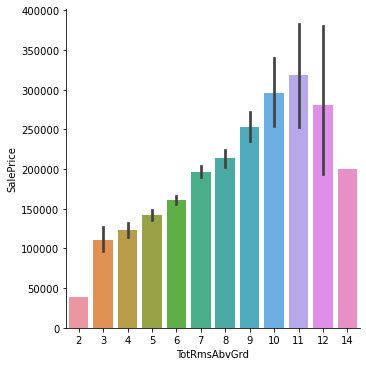

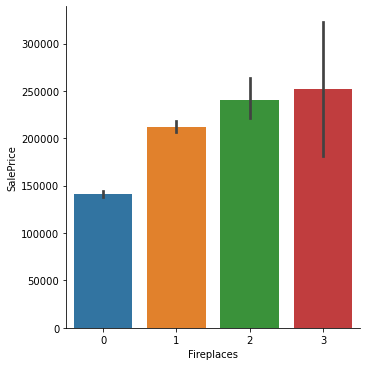

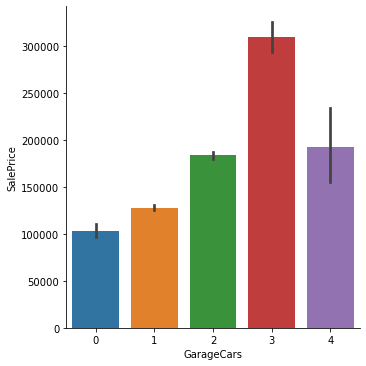

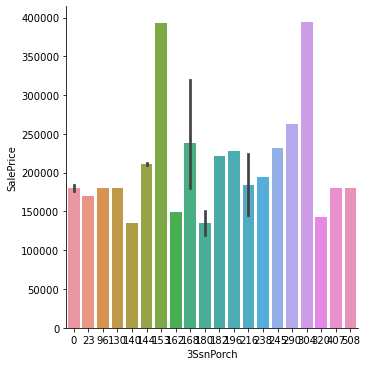

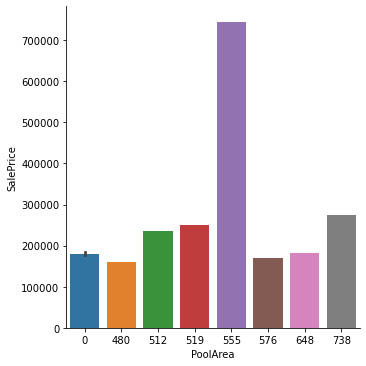

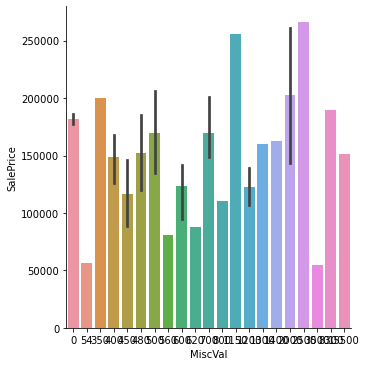

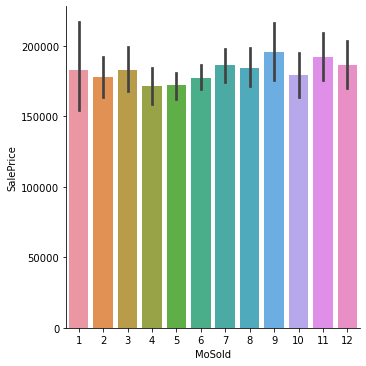

In [24]:
for feature in discrete_data:
    dicrete_data=numericaldata.copy()
    sns.catplot(x= dicrete_data[feature],y= dicrete_data['SalePrice'],kind='bar',data= dicrete_data)

### There is an relationship between all discrete variables and sales price

## Continous data

In [34]:
continous_data=[feature for feature in numericaldata if feature not in discrete_data+['Id']+year_feature]

In [35]:
print(continous_data)
print("\nThe number of Continous features in the numerical data is {}".format(len(continous_data)) )

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']

The number of Continous features in the numerical data is 16


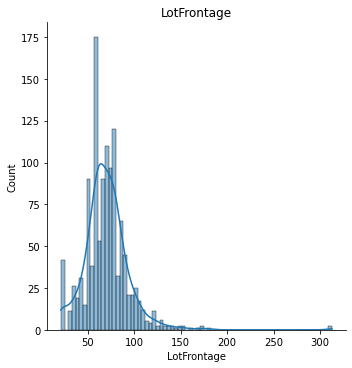

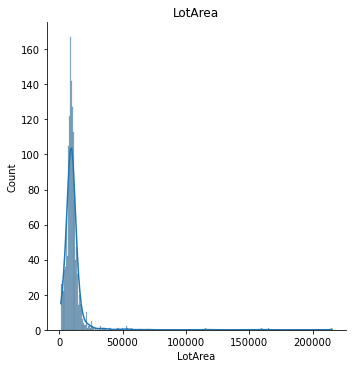

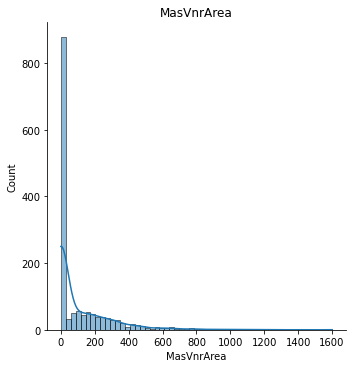

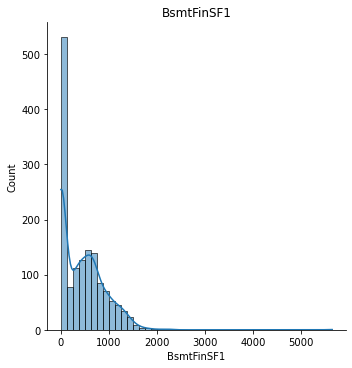

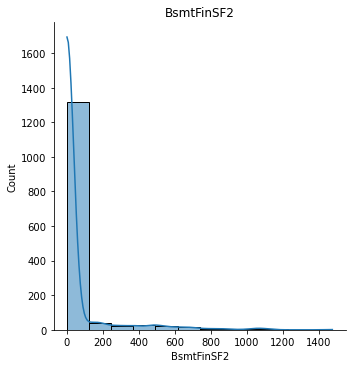

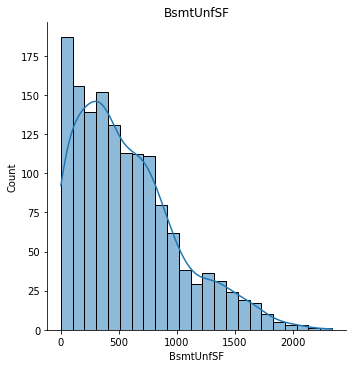

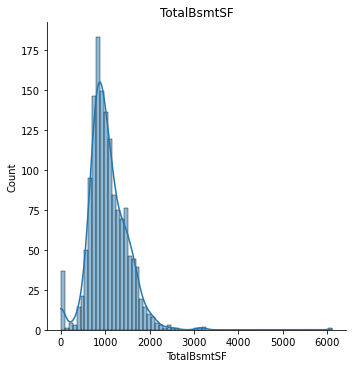

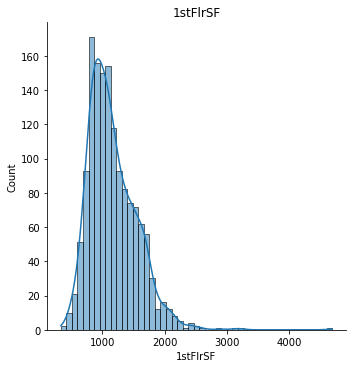

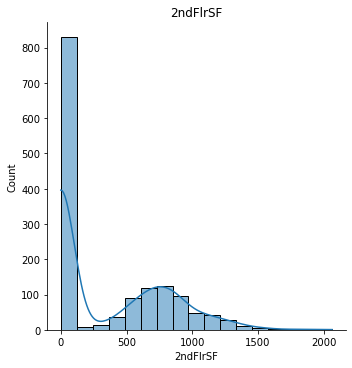

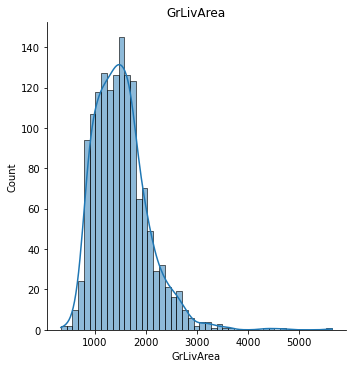

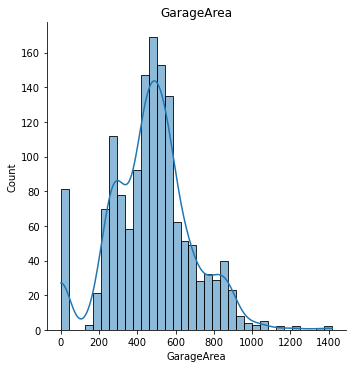

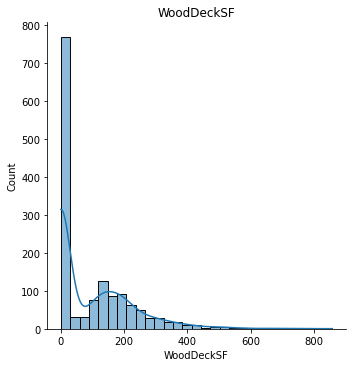

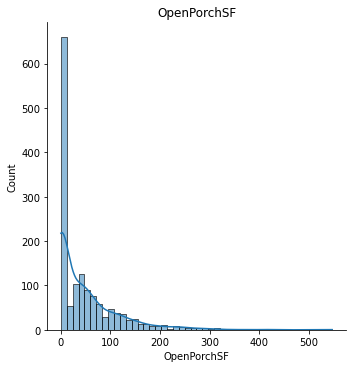

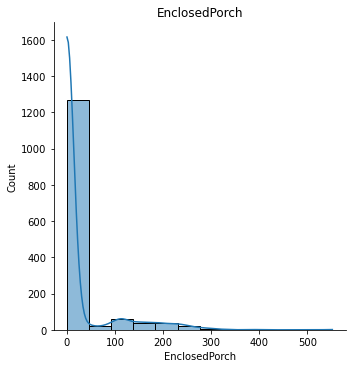

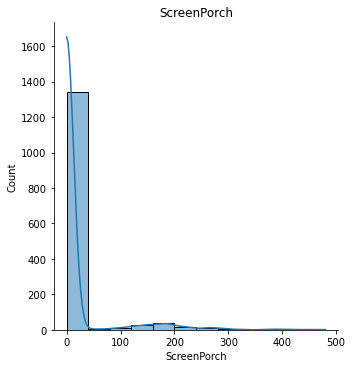

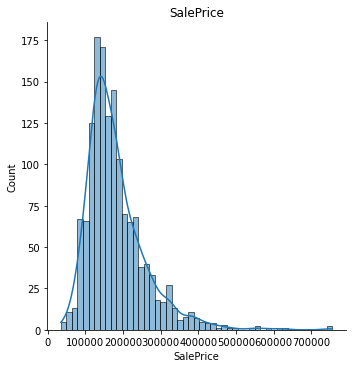

In [27]:
for feature in continous_data:
    numeric_data=numericaldata.copy()
    sns.displot(data=numeric_data,x=numeric_data[feature],kind='hist',kde=True).set(title=feature)


### All the distributions are skewed so we have to apply log transformation 

In [36]:
# To ignore the log 0 warning
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

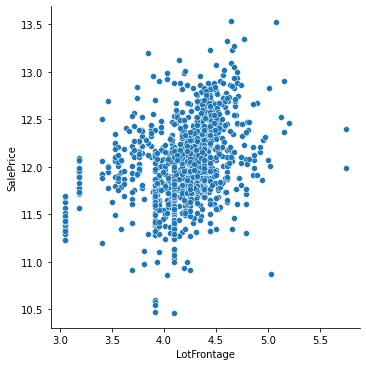

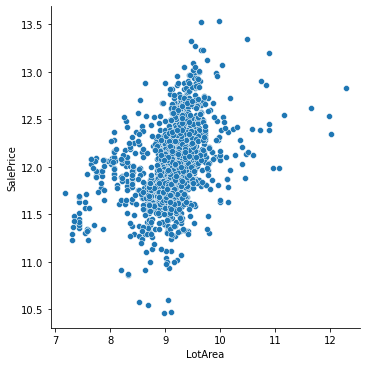

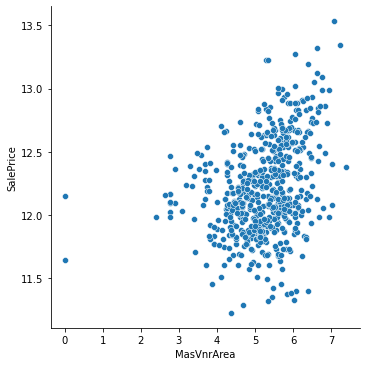

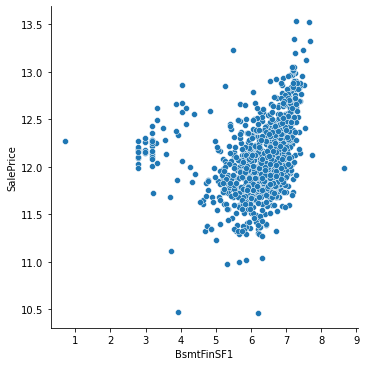

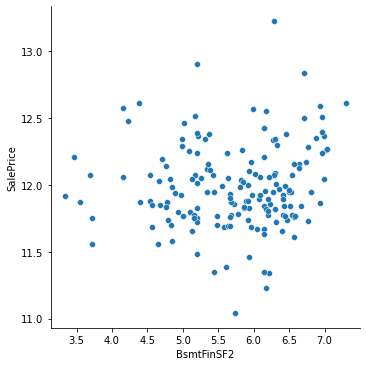

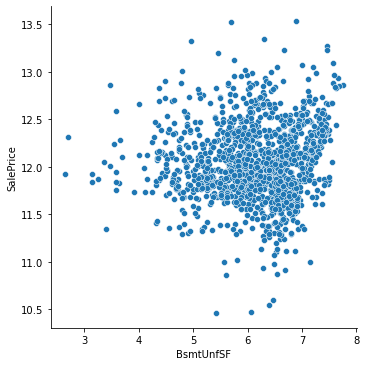

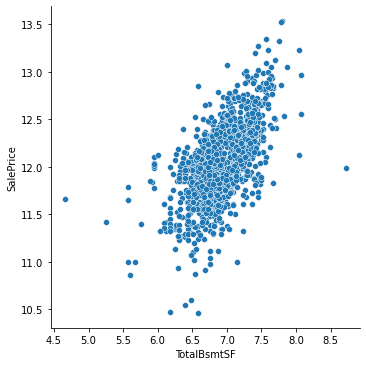

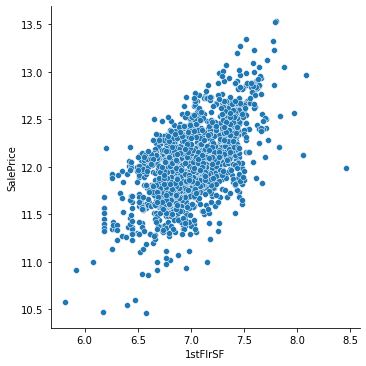

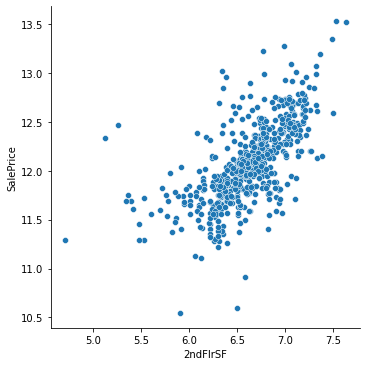

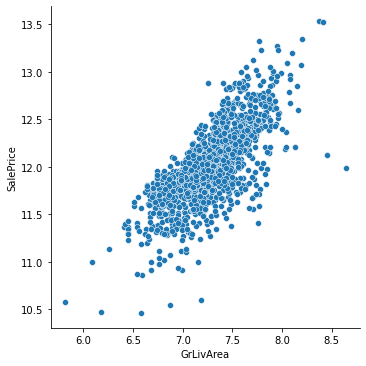

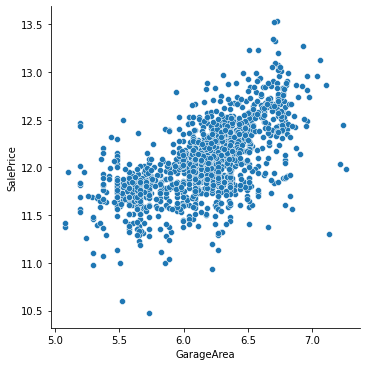

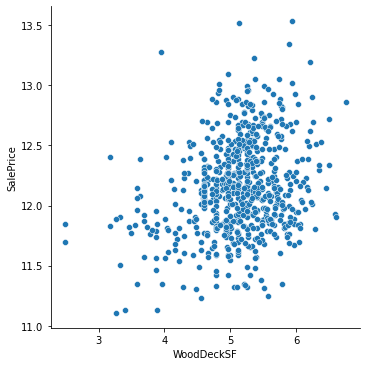

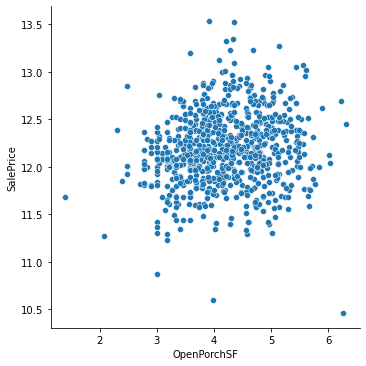

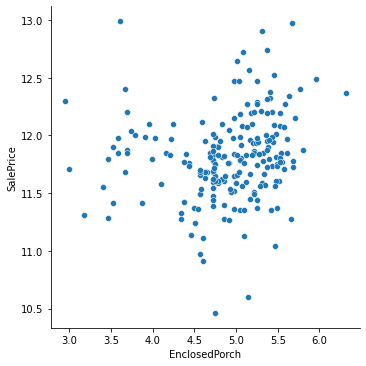

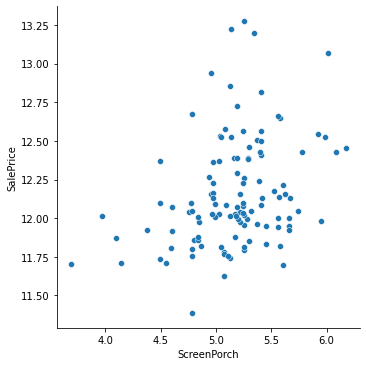

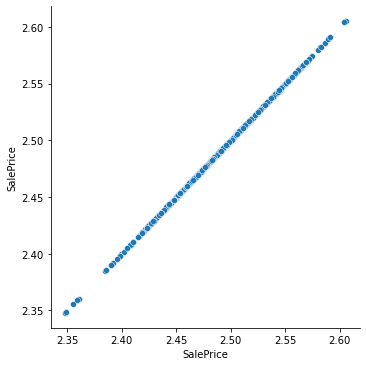

In [37]:
for logtransform in continous_data:
    log=numericaldata.copy()
    #if 0 in log[logtransform].unique():
    #pass
    #else:
    log[logtransform]=np.log(log[logtransform])
    log['SalePrice']=np.log(log['SalePrice'])
    sns.relplot(kind="scatter",x=log[logtransform],y=log['SalePrice'],data=log)

## Categorical data

In [38]:
categorical_data=[feature for feature in train.columns if train[feature].dtypes=='O']
print(categorical_data)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'DataType']


In [39]:
categorical_missing_value=[feature for feature in train.columns if train[feature].isnull().sum()]

for feature in categorical_missing_value:
    print('{}:{} % missing values'.format(feature,np.round(train[feature].isnull().mean(),4)))

LotFrontage:0.1774 % missing values
Alley:0.9377 % missing values
MasVnrType:0.0055 % missing values
MasVnrArea:0.0055 % missing values
BsmtQual:0.0253 % missing values
BsmtCond:0.0253 % missing values
BsmtExposure:0.026 % missing values
BsmtFinType1:0.0253 % missing values
BsmtFinType2:0.026 % missing values
Electrical:0.0007 % missing values
FireplaceQu:0.4726 % missing values
GarageType:0.0555 % missing values
GarageYrBlt:0.0555 % missing values
GarageFinish:0.0555 % missing values
GarageQual:0.0555 % missing values
GarageCond:0.0555 % missing values
PoolQC:0.9952 % missing values
Fence:0.8075 % missing values
MiscFeature:0.963 % missing values


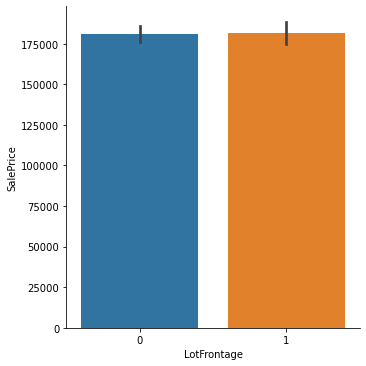

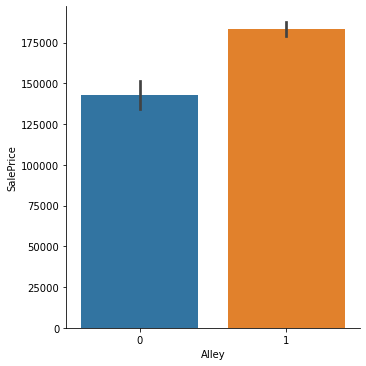

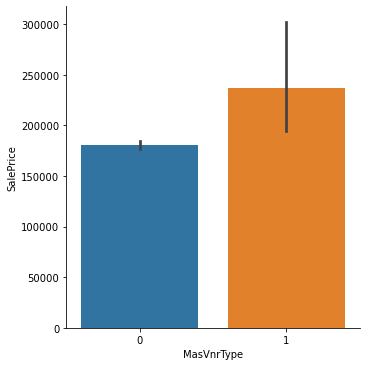

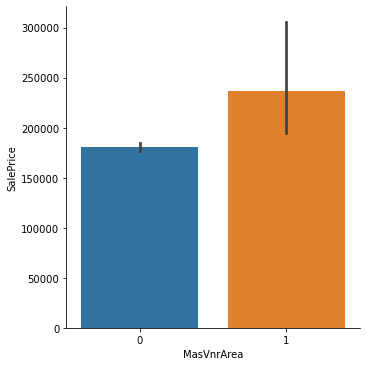

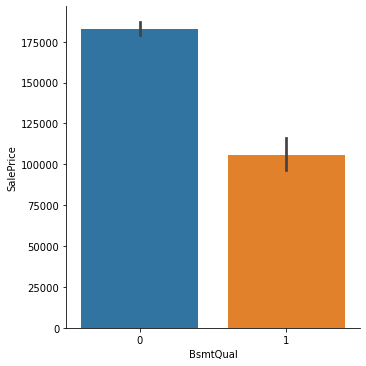

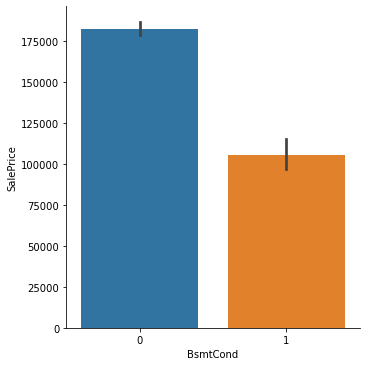

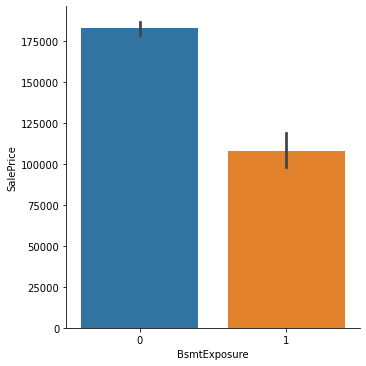

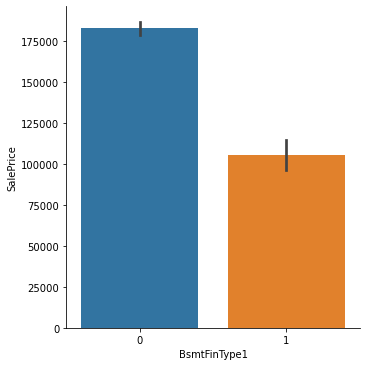

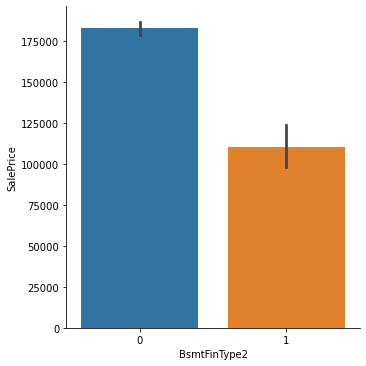

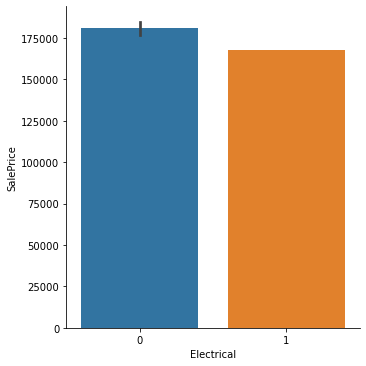

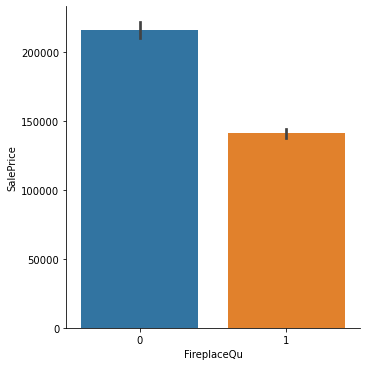

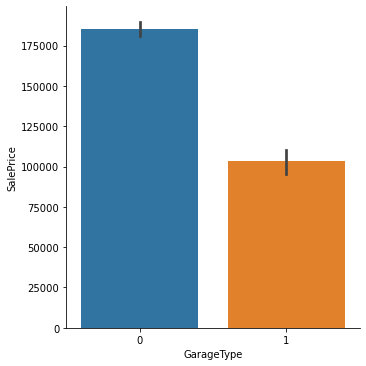

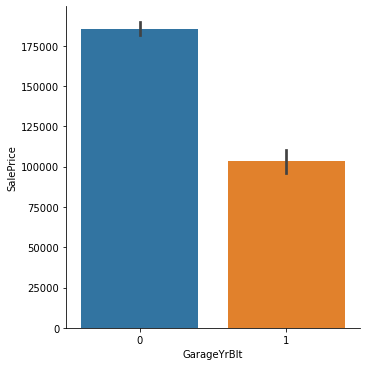

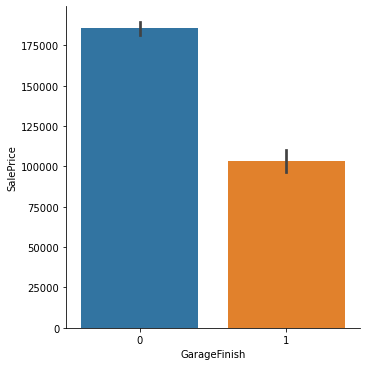

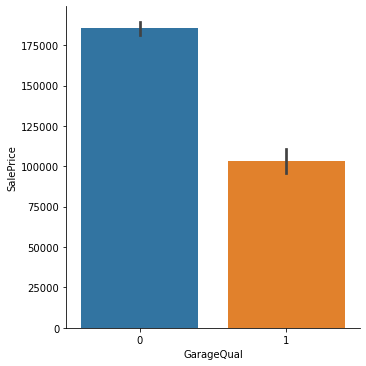

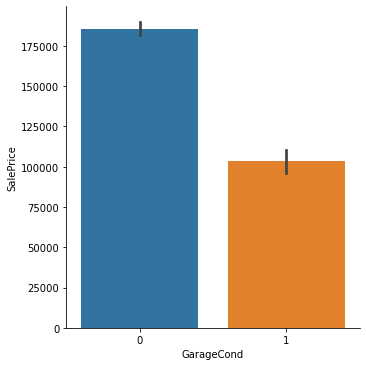

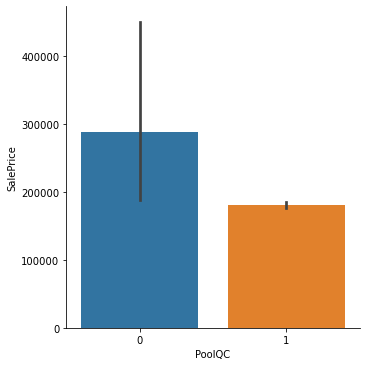

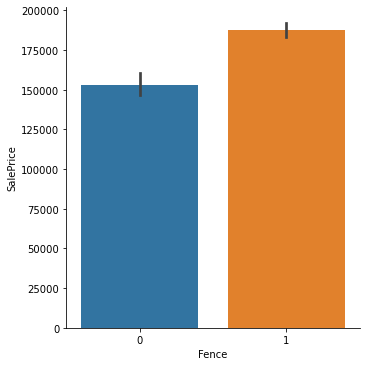

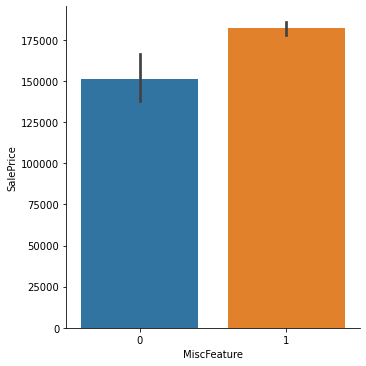

In [26]:
for feature in categorical_missing_value:
    copydata=train.copy()
    copydata[feature]=np.where(copydata[feature].isnull(),1,0)
    sns.catplot(x=feature,y='SalePrice',kind='bar',data=copydata)
#There is propotion between missing values and the features.

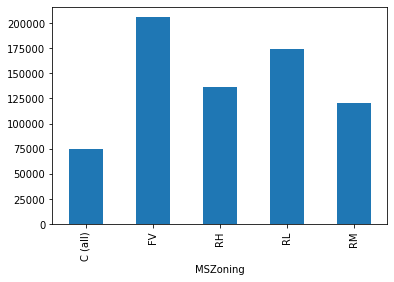

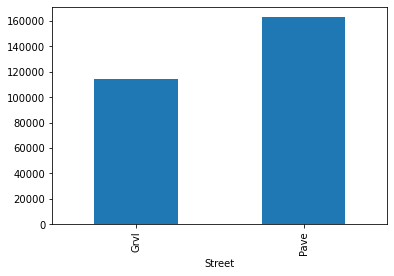

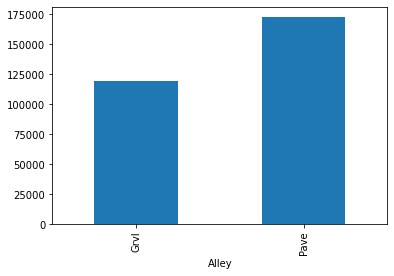

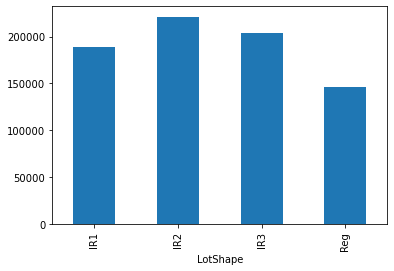

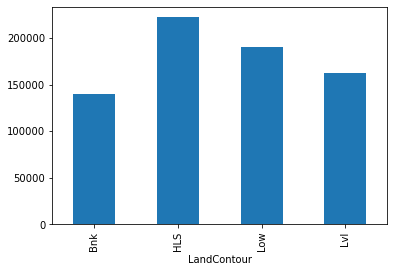

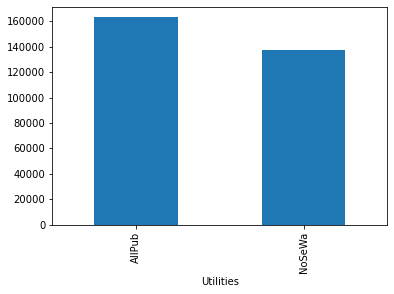

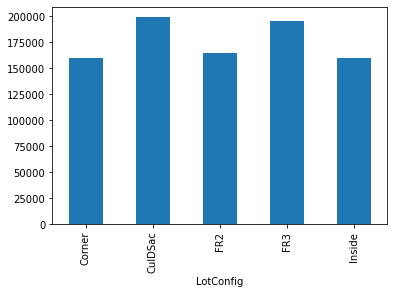

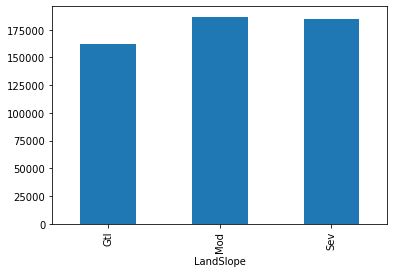

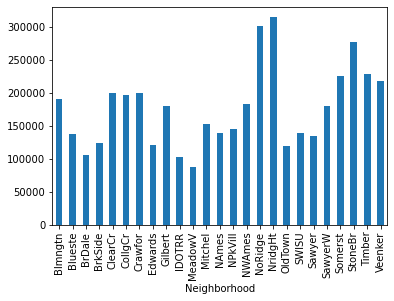

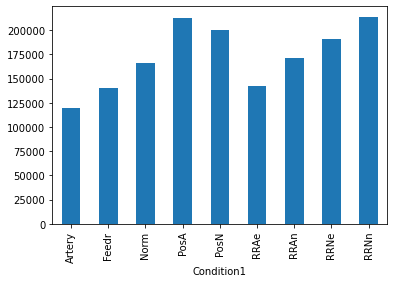

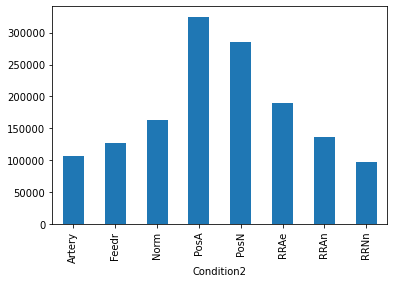

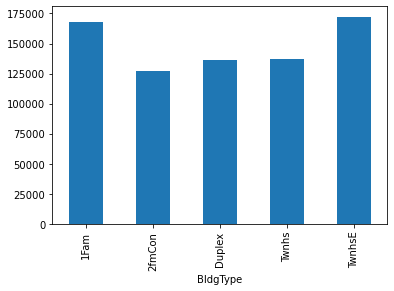

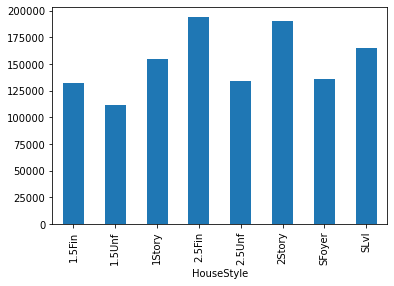

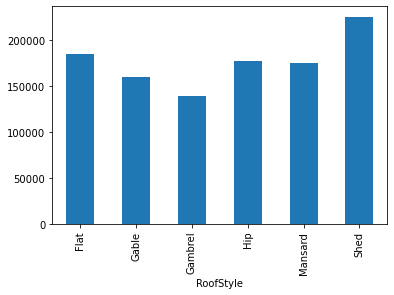

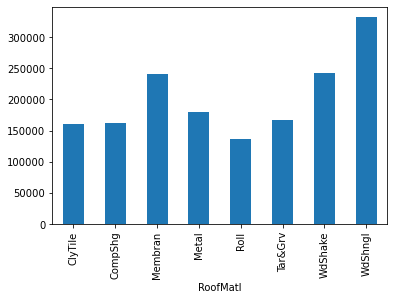

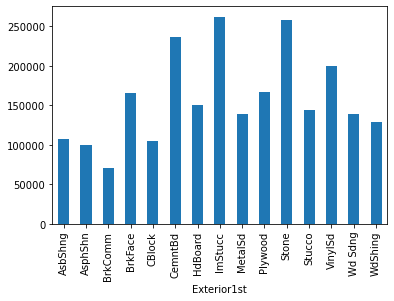

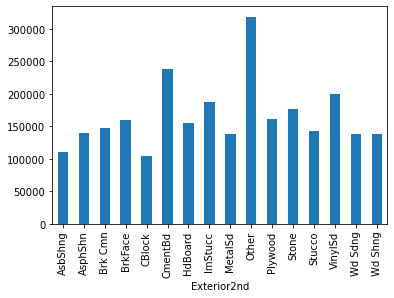

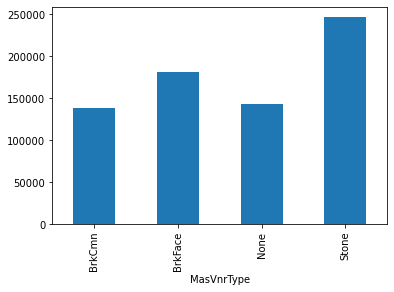

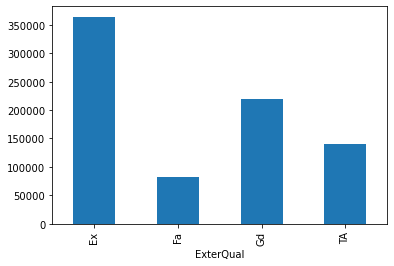

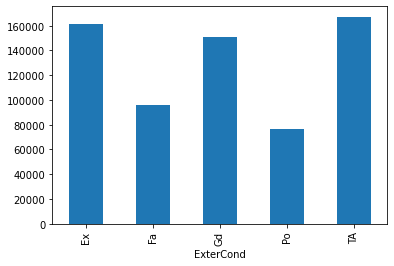

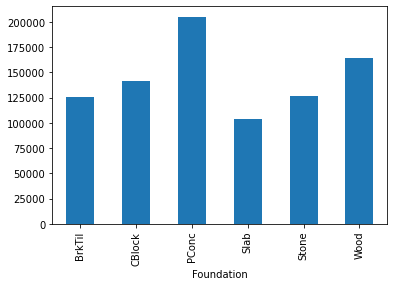

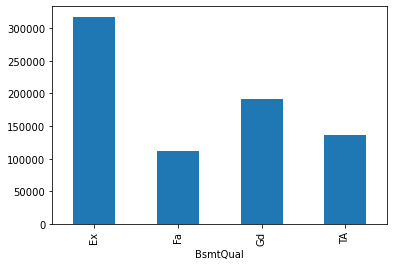

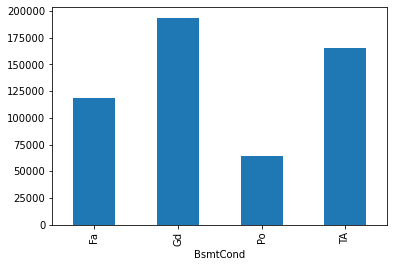

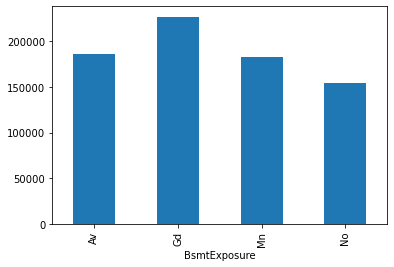

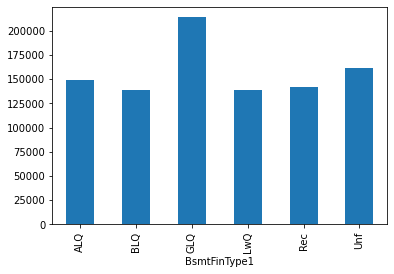

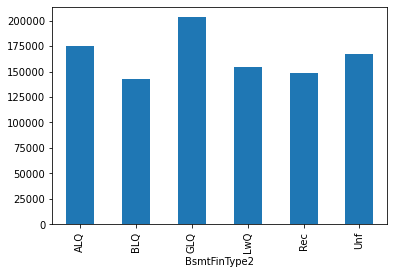

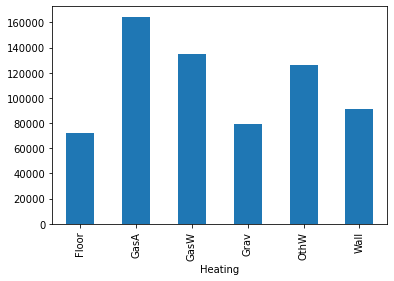

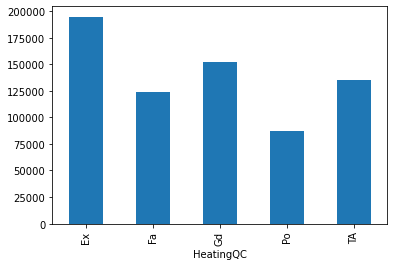

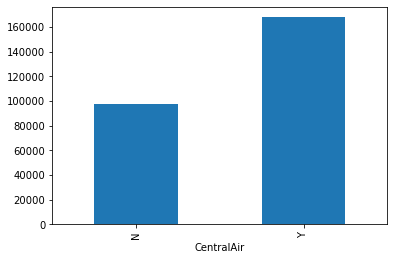

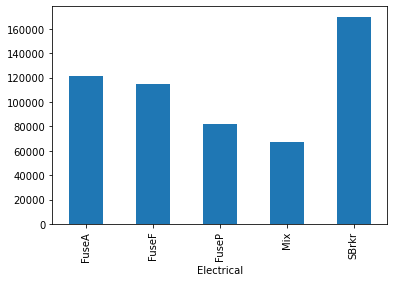

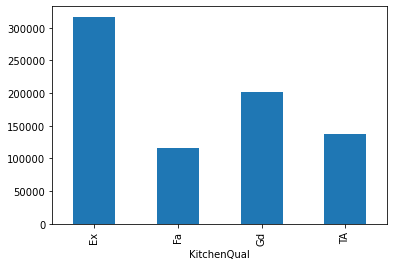

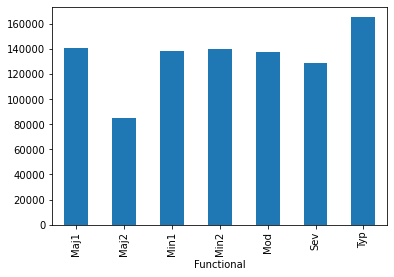

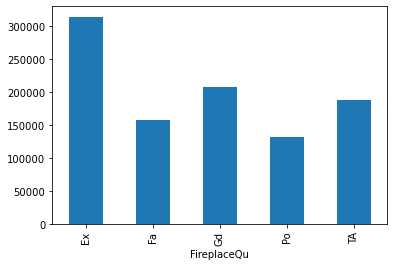

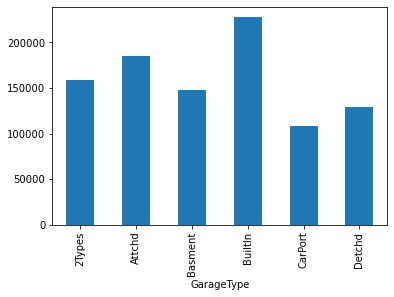

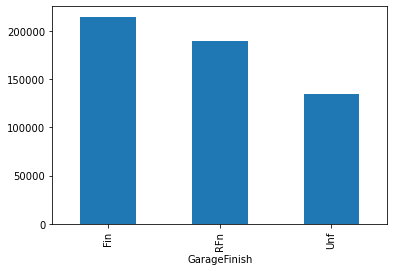

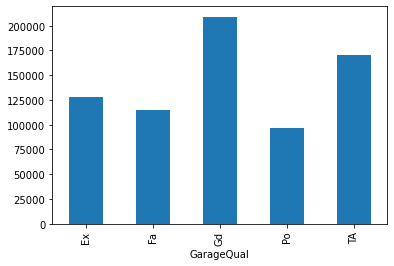

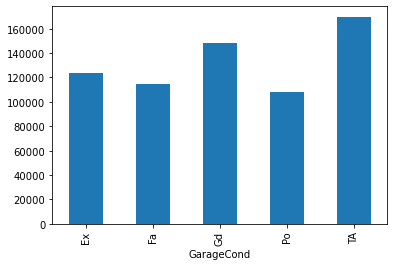

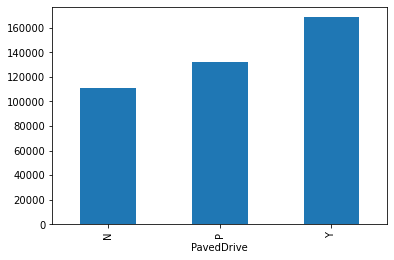

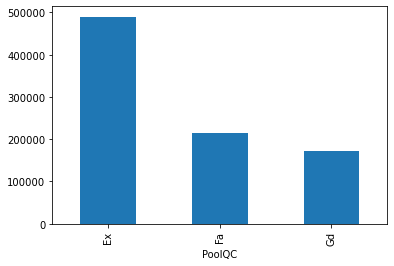

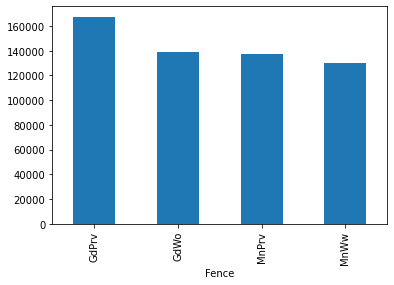

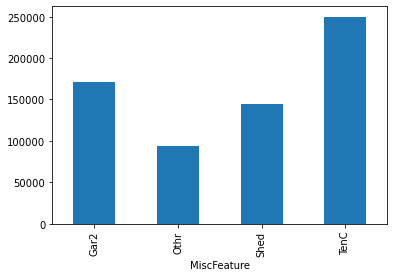

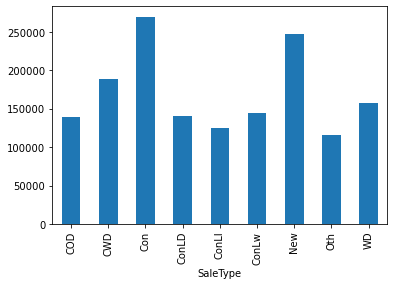

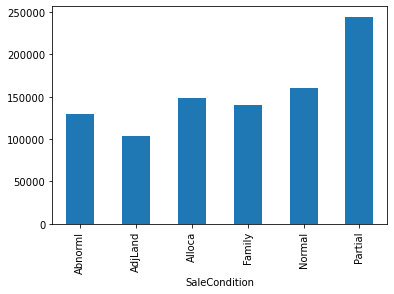

In [33]:
for feature in categorical_data:
    cat_data=train.copy()
    cat_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

## Feature Engineering

In [40]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DataType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Train
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Train
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Train
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Train


In [41]:
train.shape

(1460, 82)

In [43]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
DataType          object
Length: 82, dtype: object

In [44]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DataType
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,Test
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,Test
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,Test
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,Test
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,Test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,Test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,Test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,Test


In [45]:
train.isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
                ... 
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Id                 0
Length: 82, dtype: int64

In [46]:
test.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
CentralAir          0
SaleCondition       0
Heating             0
Id                  0
Length: 81, dtype: int64

### Both train and test data has same missing value features so we will combine it 

In [48]:
#train1=train.drop(['Id','SalePrice'],axis=1)
#test=test.drop('Id',axis=1)
train1=train.drop('SalePrice',axis=1)

In [49]:
print(train1.shape)
print(test.shape)

(1460, 81)
(1459, 81)


In [50]:
combineddata=pd.concat([train1,test],axis=0)

In [51]:
combineddata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DataType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,Test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,Test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,Test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,Test


In [52]:
numericdata=combineddata.select_dtypes(include=np.number)
objdata=combineddata.select_dtypes(include=np.object)

In [53]:
numericdata.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12,2008
5,6,50,85.0,14115,5,5,1993,1995,0.0,732.0,...,480.0,40,30,0,320,0,0,700,10,2009
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369.0,...,636.0,255,57,0,0,0,0,0,8,2007
7,8,60,NaN,10382,7,6,1973,1973,240.0,859.0,...,484.0,235,204,228,0,0,0,350,11,2009
8,9,50,51.0,6120,7,5,1931,1950,0.0,0.0,...,468.0,90,0,205,0,0,0,0,4,2008
9,10,190,50.0,7420,5,6,1939,1950,0.0,851.0,...,205.0,0,4,0,0,0,0,0,1,2008


In [54]:
numericdata

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [40]:
objdata

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,DataType
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,Train
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal,Test
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,Test
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,Test
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,Test


In [55]:
#Temporal Data
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [56]:
#Lets reduce the value of all the temporal features with present year
for year in year_feature:
    numericdata[year]=numericdata['YrSold']-numericdata[year]


<ipython-input-56-4bf6fa999108>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericdata[year]=numericdata['YrSold']-numericdata[year]


In [43]:
numericdata.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallCond        0
YearBuilt          0
YearRemodAdd       0
OverallQual        0
GrLivArea          0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
YrSold             0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MSSubClass         0
dtype: int64

### Handling Numerical Missing Values

In [57]:
from sklearn.impute import SimpleImputer

In [58]:
numericimputer=SimpleImputer(missing_values=np.nan,strategy="median")

In [59]:
numericdatadf=numericimputer.fit_transform(numericdata)

In [60]:
numlabels=numericdata.columns

In [61]:
# When we use simple imputer dataframe will be converted to numpy array so we have to convert array to data frame

In [63]:
numericdata=pd.DataFrame(numericdatadf,columns=numlabels)

In [64]:
numericdata.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,5.0,5.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,31.0,31.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,7.0,6.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,91.0,36.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,8.0,8.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
5,6.0,50.0,85.0,14115.0,5.0,5.0,16.0,14.0,0.0,732.0,...,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,0.0
6,7.0,20.0,75.0,10084.0,8.0,5.0,3.0,2.0,186.0,1369.0,...,636.0,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
7,8.0,60.0,68.0,10382.0,7.0,6.0,36.0,36.0,240.0,859.0,...,484.0,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11.0,0.0
8,9.0,50.0,51.0,6120.0,7.0,5.0,77.0,58.0,0.0,0.0,...,468.0,90.0,0.0,205.0,0.0,0.0,0.0,0.0,4.0,0.0
9,10.0,190.0,50.0,7420.0,5.0,6.0,69.0,58.0,0.0,851.0,...,205.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
numericdata=numericdata.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold'],axis=1)

In [66]:
numericdata=numericdata.drop(['BsmtFinSF2'],axis=1)

In [67]:
# Checking for Zero Values

In [68]:
numericdata[(numericdata==0).any(axis=1)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,5.0,5.0,196.0,706.0,...,2.0,1.0,3.0,1.0,8.0,0.0,5.0,2.0,548.0,2.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,31.0,31.0,0.0,978.0,...,2.0,0.0,3.0,1.0,6.0,1.0,31.0,2.0,460.0,5.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,7.0,6.0,162.0,486.0,...,2.0,1.0,3.0,1.0,6.0,1.0,7.0,2.0,608.0,9.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,91.0,36.0,0.0,216.0,...,1.0,0.0,3.0,1.0,7.0,1.0,8.0,3.0,642.0,2.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,8.0,8.0,350.0,655.0,...,2.0,1.0,4.0,1.0,9.0,1.0,8.0,3.0,836.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915.0,160.0,21.0,1936.0,4.0,7.0,36.0,36.0,0.0,0.0,...,1.0,1.0,3.0,1.0,5.0,0.0,29.0,0.0,0.0,6.0
2915,2916.0,160.0,21.0,1894.0,4.0,5.0,36.0,36.0,0.0,252.0,...,1.0,1.0,3.0,1.0,6.0,0.0,36.0,1.0,286.0,4.0
2916,2917.0,20.0,160.0,20000.0,5.0,7.0,46.0,10.0,0.0,1224.0,...,1.0,0.0,4.0,1.0,7.0,1.0,46.0,2.0,576.0,9.0
2917,2918.0,85.0,62.0,10441.0,5.0,5.0,14.0,14.0,0.0,337.0,...,1.0,0.0,3.0,1.0,6.0,0.0,29.0,0.0,0.0,7.0


In [55]:
#MasVnrArea

In [69]:
numericdata['MasVnrArea']=numericdata.replace(numericdata.MasVnrArea==0,numericdata.MasVnrArea.median())

In [70]:
numericdata['BsmtFinSF1']=numericdata.replace(numericdata.BsmtFinSF1==0,numericdata.BsmtFinSF1.median())

In [71]:
numericdata['BsmtUnfSF']=numericdata.replace(numericdata.BsmtUnfSF==0,numericdata.BsmtUnfSF.median())

In [72]:
numericdata['FullBath']=numericdata.replace(numericdata.FullBath==0,numericdata.FullBath.median())

In [73]:
numericdata['HalfBath']=numericdata.replace(numericdata.HalfBath==0,numericdata.HalfBath.median())

### Handling Object data

In [74]:
objdata.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
HeatingQC           0
Condition2          0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
RoofStyle           0
BldgType            0
HouseStyle          0
Heating             0
RoofMatl            0
PavedDrive          0
ExterQual           0
ExterCond           0
Foundation          0
SaleCondition       0
CentralAir          0
DataType            0
dtype: int64

In [75]:
nanvalues=[feature for feature in objdata if objdata[feature].isnull().sum()]

In [76]:
print(nanvalues)
print("the number of mising values features is {}".format(len(nanvalues)))

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
the number of mising values features is 23


In [77]:
for miss in nanvalues:
    print("The Feature Name :{} and missing value:{} %".format(miss,np.round(objdata[miss].isnull().mean()*100,4)))

The Feature Name :MSZoning and missing value:0.137 %
The Feature Name :Alley and missing value:93.2169 %
The Feature Name :Utilities and missing value:0.0685 %
The Feature Name :Exterior1st and missing value:0.0343 %
The Feature Name :Exterior2nd and missing value:0.0343 %
The Feature Name :MasVnrType and missing value:0.8222 %
The Feature Name :BsmtQual and missing value:2.7749 %
The Feature Name :BsmtCond and missing value:2.8092 %
The Feature Name :BsmtExposure and missing value:2.8092 %
The Feature Name :BsmtFinType1 and missing value:2.7064 %
The Feature Name :BsmtFinType2 and missing value:2.7407 %
The Feature Name :Electrical and missing value:0.0343 %
The Feature Name :KitchenQual and missing value:0.0343 %
The Feature Name :Functional and missing value:0.0685 %
The Feature Name :FireplaceQu and missing value:48.6468 %
The Feature Name :GarageType and missing value:5.3786 %
The Feature Name :GarageFinish and missing value:5.4471 %
The Feature Name :GarageQual and missing value:

In [78]:
#Alley and MiscFeature has more than 90% missing data so we will remove the two insignificant feature

In [79]:
objdata=objdata.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1)

In [80]:
objdata.isnull().sum().sort_values(ascending=False)

FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
LandContour         0
BldgType            0
LotShape            0
Street              0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
DataType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
ExterQual           0
ExterCond           0
SaleCondition       0
Heating             0
HeatingQC           0
CentralAir          0
PavedDrive          0
Foundation          0
dtype: int64

In [81]:
#1)FireplaceQu 
objdata.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [82]:
#Handling Categorical data
categoricalimputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [83]:
categoricaldatadf=categoricalimputer.fit_transform(objdata)

In [84]:
catlabels=objdata.columns

In [85]:
objdata=pd.DataFrame(categoricaldatadf,columns=catlabels)

In [86]:
objdata.isnull().sum().sort_values(ascending=False)

DataType         0
SaleCondition    0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
ExterCond        0
Foundation       0
BsmtQual         0
Functional       0
SaleType         0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
FireplaceQu      0
KitchenQual      0
BsmtCond         0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64

In [76]:
#Checking for outliers in numerical data

In [87]:
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [88]:
numericdata.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold'],
      dtype='object')

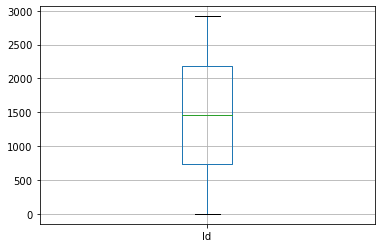

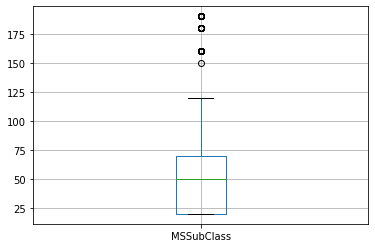

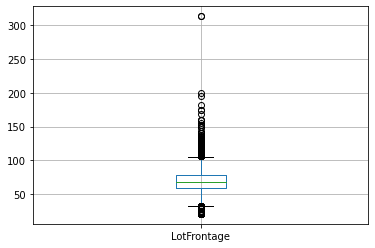

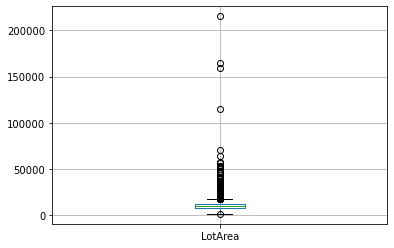

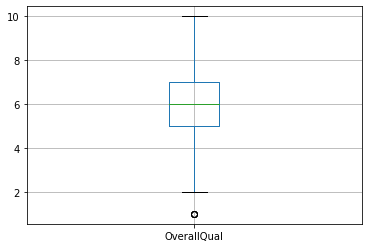

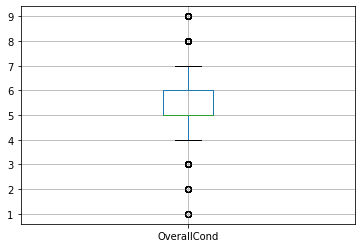

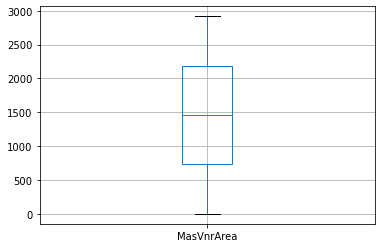

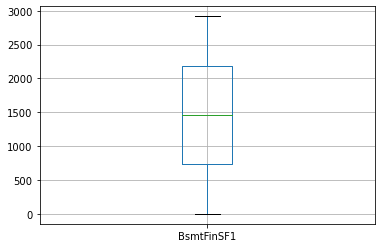

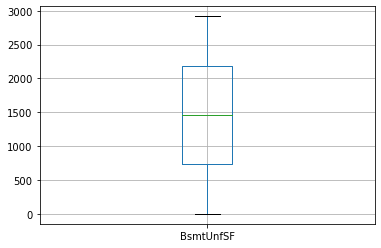

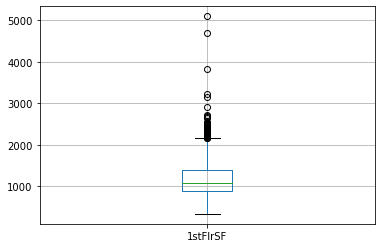

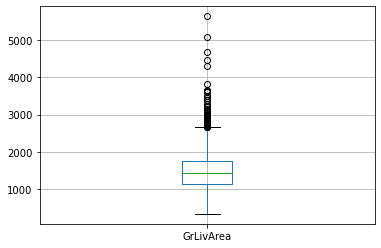

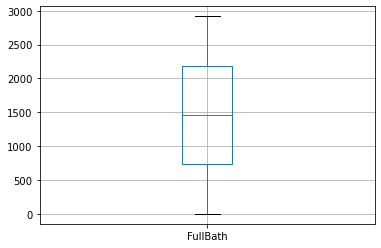

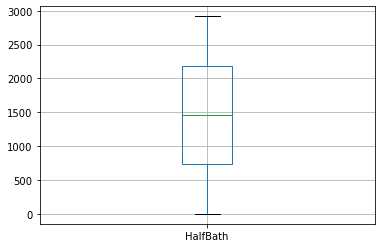

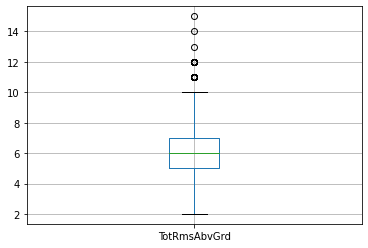

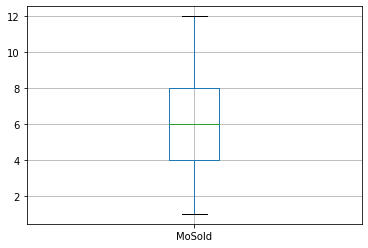

In [89]:
for feature in numericdata.columns:
    data=numericdata.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.show()

In [90]:
numericdata.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold'],
      dtype='object')

In [ ]:
@@@@@@@@

In [80]:
# Detecting Outliers using Inter quaratile range

In [81]:
#Handling Outliers in LotFrontage

In [106]:
#
def detect_outliers(numericdata,cols):
        q1=numericdata[cols].quantile(0.25)
        q3=numericdata[cols].quantile(0.75)
        iqr=q3-q1
        upper_bound=q3+(1.5*iqr)
        lower_bound=q1-(1.5*iqr)
        return upper_bound,lower_bound


In [92]:
lower_bound,upper_bound=detect_outliers(numericdata,'LotFrontage')

In [93]:
lower_bound,upper_bound

(105.0, 33.0)

In [94]:
numericdata['LotFrontage']=np.where(numericdata['LotFrontage']<lower_bound,lower_bound,
                           np.where(numericdata['LotFrontage']>upper_bound,upper_bound,numericdata['LotFrontage']))

In [95]:
numericdata.LotFrontage.describe()

count    2919.000000
mean      101.374101
std        15.748097
min        33.000000
25%       105.000000
50%       105.000000
75%       105.000000
max       105.000000
Name: LotFrontage, dtype: float64

In [90]:
# MsSubclass

In [110]:
def detect_outliers(numericdata,cols):
        q1=numericdata[cols].quantile(0.25)
        q3=numericdata[cols].quantile(0.75)
        iqr=q3-q1
        upper_bound=q3+(1.5*iqr)
        lower_bound=q1-(1.5*iqr)
        return upper_bound

In [96]:
upper_bound,lower_bound=detect_outliers(numericdata,'MSSubClass')
print(upper_bound,lower_bound)

145.0 -55.0


In [97]:
numericdata['MSSubClass']=np.where(numericdata['MSSubClass']>upper_bound,upper_bound,numericdata['MSSubClass'])

In [98]:
numericdata.MSSubClass.describe()

count    2919.000000
mean       55.334018
std        37.790000
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       145.000000
Name: MSSubClass, dtype: float64

In [97]:
# Lotarea

In [99]:
upper_bound,lower_bound=detect_outliers(numericdata,'LotArea')
print(upper_bound,lower_bound)

17708.0 1340.0


In [100]:
numericdata['LotArea']=np.where(numericdata['LotArea']<lower_bound,lower_bound,
                           np.where(numericdata['LotArea']>upper_bound,upper_bound,numericdata['LotArea']))

In [101]:
numericdata.LotArea.describe()

count     2919.000000
mean      9576.512847
std       3611.992836
min       1340.000000
25%       7478.000000
50%       9453.000000
75%      11570.000000
max      17708.000000
Name: LotArea, dtype: float64

In [ ]:
#Overallqual

In [103]:
lower_bound=detect_outliers(numericdata,'OverallQual')
print(lower_bound)

2.0


In [104]:
numericdata['OverallQual']=np.where(numericdata['OverallQual']<lower_bound,lower_bound,numericdata['OverallQual'])

In [105]:
numericdata.OverallQual.describe()

count    2919.000000
mean        6.090442
std         1.405478
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [ ]:
#Overallquand

In [107]:
lower_bound,upper_bound=detect_outliers(numericdata,'OverallCond')
print(lower_bound,upper_bound)

7.5 3.5


In [108]:
numericdata['OverallCond']=np.where(numericdata['OverallCond']<lower_bound,lower_bound,
                           np.where(numericdata['OverallCond']>upper_bound,upper_bound,numericdata['OverallCond']))

In [109]:
numericdata.OverallCond.describe()

count    2919.000000
mean        7.246489
std         0.974732
min         3.500000
25%         7.500000
50%         7.500000
75%         7.500000
max         7.500000
Name: OverallCond, dtype: float64

In [ ]:
# 1stFlrSF

In [111]:
upper_bound=detect_outliers(numericdata,'1stFlrSF')
print(upper_bound)

2154.75


In [112]:
numericdata['1stFlrSF']=np.where(numericdata['1stFlrSF']>upper_bound,upper_bound,numericdata['1stFlrSF'])

In [113]:
 #GrLivArea

In [114]:
upper_bound=detect_outliers(numericdata,'GrLivArea')
print(upper_bound)

2669.75


In [115]:
numericdata['GrLivArea']=np.where(numericdata['GrLivArea']>upper_bound,upper_bound,numericdata['GrLivArea'])

In [116]:
#

In [117]:
upper_bound=detect_outliers(numericdata,'TotRmsAbvGrd')
print(upper_bound)

10.0


In [118]:
numericdata['TotRmsAbvGrd']=np.where(numericdata['TotRmsAbvGrd']>upper_bound,upper_bound,numericdata['TotRmsAbvGrd'])

In [119]:
numericdata.head(20)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold
0,1.0,60.0,105.0,8450.0,7.0,7.5,5.0,5.0,1.0,1.0,...,1.0,1.0,3.0,1.0,8.0,0.0,5.0,2.0,548.0,2.0
1,2.0,20.0,105.0,9600.0,6.0,3.5,31.0,31.0,2.0,2.0,...,2.0,2.0,3.0,1.0,6.0,1.0,31.0,2.0,460.0,5.0
2,3.0,60.0,105.0,11250.0,7.0,7.5,7.0,6.0,3.0,3.0,...,3.0,3.0,3.0,1.0,6.0,1.0,7.0,2.0,608.0,9.0
3,4.0,70.0,105.0,9550.0,7.0,7.5,91.0,36.0,4.0,4.0,...,4.0,4.0,3.0,1.0,7.0,1.0,8.0,3.0,642.0,2.0
4,5.0,60.0,105.0,14260.0,8.0,7.5,8.0,8.0,5.0,5.0,...,5.0,5.0,4.0,1.0,9.0,1.0,8.0,3.0,836.0,12.0
5,6.0,50.0,105.0,14115.0,5.0,7.5,16.0,14.0,6.0,6.0,...,6.0,6.0,1.0,1.0,5.0,0.0,16.0,2.0,480.0,10.0
6,7.0,20.0,105.0,10084.0,8.0,7.5,3.0,2.0,7.0,7.0,...,7.0,7.0,3.0,1.0,7.0,1.0,3.0,2.0,636.0,8.0
7,8.0,60.0,105.0,10382.0,7.0,7.5,36.0,36.0,8.0,8.0,...,8.0,8.0,3.0,1.0,7.0,2.0,36.0,2.0,484.0,11.0
8,9.0,50.0,105.0,6120.0,7.0,7.5,77.0,58.0,9.0,9.0,...,9.0,9.0,2.0,2.0,8.0,2.0,77.0,2.0,468.0,4.0
9,10.0,145.0,105.0,7420.0,5.0,7.5,69.0,58.0,10.0,10.0,...,10.0,10.0,2.0,2.0,5.0,2.0,69.0,1.0,205.0,1.0


### The features which had outliers have been capped

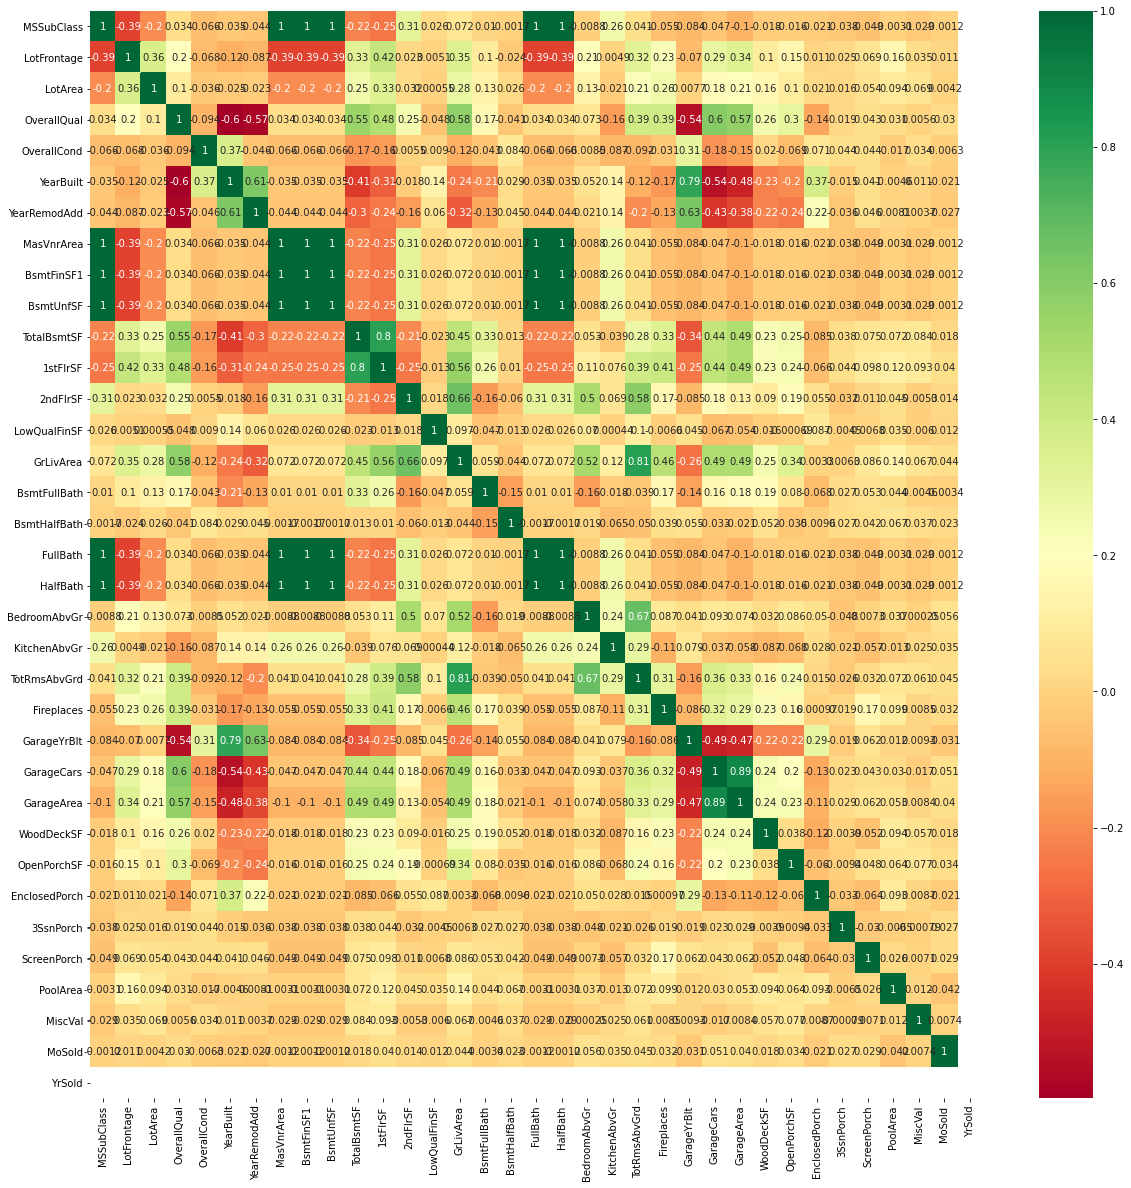

In [111]:
corrmat = numericdata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [120]:
# From the heatmap  we can infer the higly correlated features are 'MSSubClass','LotFrontage','LotArea','Year_built','OverallQual'
#,'YearBuilt',,'YearRemodAdd','GarageYrBlt', 'GarageCars', 'GarageArea','GrLivArea' ,'TotRmsAbvGrd', 'Fireplaces'
#,'Fullbath','HalfBath'

In [120]:
numericdata.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold'],
      dtype='object')

In [121]:
# The GarageArea and Garagecar remains the same so we can take any one feature
#'TotalBsmtSF' and '1stFloor'also are the  same 
#Totalabvgrd' and and grliving are also same

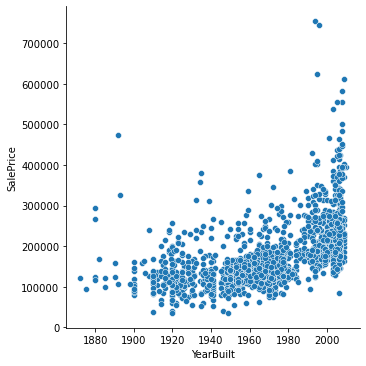

In [122]:
sns.relplot(x='YearBuilt',y='SalePrice',data=numericaldata)

### Saleprice and Yearbuilt are slighly correlated

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

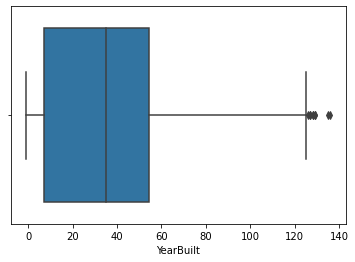

In [121]:
sns.boxplot(numericdata['YearBuilt'])

In [123]:
def detect_outliers(numericdata,cols):
        q1=numericdata[cols].quantile(0.25)
        q3=numericdata[cols].quantile(0.75)
        iqr=q3-q1
        upper_bound=q3+(1.5*iqr)
        lower_bound=q1-(1.5*iqr)
        return upper_bound

In [124]:
upper_bound=detect_outliers(numericdata,'YearBuilt')


In [125]:
numericdata['YearBuilt']=np.where(numericdata['YearBuilt']>upper_bound,upper_bound,numericdata['YearBuilt'])

In [125]:
# Checking for normality

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

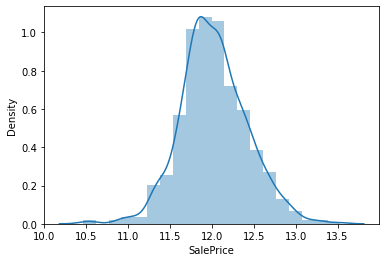

In [112]:
sns.distplot(np.log(numericaldata['SalePrice']),kde=True,hist=True,bins=20)

In [126]:
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DataType
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,Train
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,Train
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,Train
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,Train
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,Train


In [127]:
np.log(numericaldata.SalePrice).skew()

0.12133506220520406

In [128]:
np.log(numericaldata.SalePrice).kurt()

0.8095319958036296

In [129]:
#Handling Categorical variables

In [130]:
objdata

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,DataType
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Train
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Train
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Train
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,Train
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,Test
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,Typ,Gd,CarPort,Unf,TA,TA,Y,WD,Abnorml,Test
2916,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml,Test
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,Test


In [ ]:
#Splitting data into Nominal and ordinal

In [129]:
a=pd.DataFrame({'Nominal_Data':['MSzoning','Street','LotShape','LandContour','Utilities','LotConfig','Neighbourhood','Condition1','Condition2','Garagetype','Saletype','SaleCondition'],
                'Ordinal_data':['Landslope','Overallqual','OverallCond','Functional','FireplaceQu','Garagefinish','GarageQual','GarageCond','PavedDrive','datatype','Na','Na']})

In [130]:
a

,Nominal_Data,Ordinal_data
0,MSzoning,Landslope
1,Street,Overallqual
2,LotShape,OverallCond
3,LandContour,Functional
4,Utilities,FireplaceQu
5,LotConfig,Garagefinish
6,Neighbourhood,GarageQual
7,Condition1,GarageCond
8,Condition2,PavedDrive
9,Garagetype,datatype


In [125]:
# We have found that the numeric features Overallqual and OverallCond belongs to categorical  data

In [131]:
numericdata['OverallQual']=numericdata.OverallQual.astype('str')


In [132]:
numericdata['OverallCond']=numericdata.OverallQual.astype('str')

In [133]:
objdata['OverallQual']=numericdata['OverallQual']


In [134]:
objdata['OverallCond']=numericdata['OverallCond']

In [135]:
numericdata=numericdata.drop(['OverallQual','OverallCond'],axis=1)

In [136]:
objdata.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'DataType',
       'OverallQual', 'OverallCond'],
      dtype='object')

In [137]:
numericdata.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold'],
      dtype='object')

### Label encoding

In [137]:
from sklearn.preprocessing import LabelEncoder

In [139]:
#cols=objdata[['LandSlope','OverallQual','OverallCond','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']]

In [138]:
le=LabelEncoder()

In [139]:
label=objdata.apply(le.fit_transform)

In [140]:
label

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,DataType,OverallQual,OverallCond
0,3,1,3,3,0,4,0,5,2,2,...,1,1,4,4,2,8,4,1,6,6
1,3,1,3,3,0,2,0,24,1,2,...,1,1,4,4,2,8,4,1,5,5
2,3,1,0,3,0,4,0,5,2,2,...,1,1,4,4,2,8,4,1,6,6
3,3,1,0,3,0,0,0,6,2,2,...,5,2,4,4,2,8,0,1,6,6
4,3,1,0,3,0,2,0,15,2,2,...,1,1,4,4,2,8,4,1,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1,3,3,0,4,0,10,2,2,...,1,2,4,4,2,8,4,0,3,3
2915,4,1,3,3,0,4,0,10,2,2,...,4,2,4,4,2,8,0,0,3,3
2916,3,1,3,3,0,4,0,11,2,2,...,5,2,4,4,2,8,0,0,4,4
2917,3,1,3,3,0,4,0,11,2,2,...,1,2,4,4,2,8,4,0,4,4


In [141]:
label=label.drop('DataType',axis=1)

In [142]:
label.shape

(2919, 41)

In [ ]:
#objdata.LandSlope.value_counts()

### One hot encoding

In [145]:
#dummy=pd.get_dummies(objdata)

In [138]:
#dummy

In [143]:
numericdata.head(20)

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold
0,1.0,60.0,105.0,8450.0,5.0,5.0,1.0,1.0,1.0,856.0,...,1.0,1.0,3.0,1.0,8.0,0.0,5.0,2.0,548.0,2.0
1,2.0,20.0,105.0,9600.0,31.0,31.0,2.0,2.0,2.0,1262.0,...,2.0,2.0,3.0,1.0,6.0,1.0,31.0,2.0,460.0,5.0
2,3.0,60.0,105.0,11250.0,7.0,6.0,3.0,3.0,3.0,920.0,...,3.0,3.0,3.0,1.0,6.0,1.0,7.0,2.0,608.0,9.0
3,4.0,70.0,105.0,9550.0,91.0,36.0,4.0,4.0,4.0,756.0,...,4.0,4.0,3.0,1.0,7.0,1.0,8.0,3.0,642.0,2.0
4,5.0,60.0,105.0,14260.0,8.0,8.0,5.0,5.0,5.0,1145.0,...,5.0,5.0,4.0,1.0,9.0,1.0,8.0,3.0,836.0,12.0
5,6.0,50.0,105.0,14115.0,16.0,14.0,6.0,6.0,6.0,796.0,...,6.0,6.0,1.0,1.0,5.0,0.0,16.0,2.0,480.0,10.0
6,7.0,20.0,105.0,10084.0,3.0,2.0,7.0,7.0,7.0,1686.0,...,7.0,7.0,3.0,1.0,7.0,1.0,3.0,2.0,636.0,8.0
7,8.0,60.0,105.0,10382.0,36.0,36.0,8.0,8.0,8.0,1107.0,...,8.0,8.0,3.0,1.0,7.0,2.0,36.0,2.0,484.0,11.0
8,9.0,50.0,105.0,6120.0,77.0,58.0,9.0,9.0,9.0,952.0,...,9.0,9.0,2.0,2.0,8.0,2.0,77.0,2.0,468.0,4.0
9,10.0,145.0,105.0,7420.0,69.0,58.0,10.0,10.0,10.0,991.0,...,10.0,10.0,2.0,2.0,5.0,2.0,69.0,1.0,205.0,1.0


In [ ]:
#numericdata.reset_index(drop=True,inplace=True)

#dummy.reset_index(drop=True,inplace=True)

In [144]:
combineddatafinal=pd.concat([numericdata,label],axis=1)

In [145]:
numericdata

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold
0,1.0,60.0,105.0,8450.0,5.0,5.0,1.0,1.0,1.0,856.0,...,1.0,1.0,3.0,1.0,8.0,0.0,5.0,2.0,548.0,2.0
1,2.0,20.0,105.0,9600.0,31.0,31.0,2.0,2.0,2.0,1262.0,...,2.0,2.0,3.0,1.0,6.0,1.0,31.0,2.0,460.0,5.0
2,3.0,60.0,105.0,11250.0,7.0,6.0,3.0,3.0,3.0,920.0,...,3.0,3.0,3.0,1.0,6.0,1.0,7.0,2.0,608.0,9.0
3,4.0,70.0,105.0,9550.0,91.0,36.0,4.0,4.0,4.0,756.0,...,4.0,4.0,3.0,1.0,7.0,1.0,8.0,3.0,642.0,2.0
4,5.0,60.0,105.0,14260.0,8.0,8.0,5.0,5.0,5.0,1145.0,...,5.0,5.0,4.0,1.0,9.0,1.0,8.0,3.0,836.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915.0,145.0,105.0,1936.0,36.0,36.0,2915.0,2915.0,2915.0,546.0,...,2915.0,2915.0,3.0,1.0,5.0,0.0,29.0,0.0,0.0,6.0
2915,2916.0,145.0,105.0,1894.0,36.0,36.0,2916.0,2916.0,2916.0,546.0,...,2916.0,2916.0,3.0,1.0,6.0,0.0,36.0,1.0,286.0,4.0
2916,2917.0,20.0,33.0,17708.0,46.0,10.0,2917.0,2917.0,2917.0,1224.0,...,2917.0,2917.0,4.0,1.0,7.0,1.0,46.0,2.0,576.0,9.0
2917,2918.0,85.0,105.0,10441.0,14.0,14.0,2918.0,2918.0,2918.0,912.0,...,2918.0,2918.0,3.0,1.0,6.0,0.0,29.0,0.0,0.0,7.0


In [148]:
combineddatafinal=combineddatafinal.T.drop_duplicates()

In [150]:
combineddatafinal.shape

(2919, 61)

### FeatureScaling

In [ ]:
# We use normalisation as standard scalar affects the encoded value

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scale=MinMaxScaler()

In [ ]:
#scaleddata=scale.fit_transform(combineddatafinal)

In [ ]:
#scaleddata

In [ ]:
#Splitting the data into train and test

In [153]:
#combineddatafinal=combineddatafinal.drop(['MSSubClass','LotArea'],axis=1)

### Data transformation

In [374]:
# Applying power transform to all independent variables

In [394]:
from sklearn.preprocessing import power_transform

In [ ]:
print(power_transform(combineddatafinal.iloc[:,:75],method='box-cox'))

In [219]:
combineddatafinal.head(10)

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,OverallCond,SalePrice
0,60.0,105.0,8450.0,5.0,5.0,60.0,60.0,60.0,856.0,856.0,...,1,1,4,4,2,8,4,6,6,12.247694
1,20.0,105.0,9600.0,31.0,31.0,20.0,20.0,20.0,1262.0,1262.0,...,1,1,4,4,2,8,4,5,5,12.109011
2,60.0,105.0,11250.0,7.0,6.0,60.0,60.0,60.0,920.0,920.0,...,1,1,4,4,2,8,4,6,6,12.317167
3,70.0,105.0,9550.0,91.0,36.0,70.0,70.0,70.0,756.0,961.0,...,5,2,4,4,2,8,0,6,6,11.849398
4,60.0,105.0,14260.0,8.0,8.0,60.0,60.0,60.0,1145.0,1145.0,...,1,1,4,4,2,8,4,7,7,12.429216
5,50.0,105.0,14115.0,16.0,14.0,50.0,50.0,50.0,796.0,796.0,...,1,2,4,4,2,8,4,4,4,11.870600
6,20.0,105.0,10084.0,3.0,2.0,20.0,20.0,20.0,1686.0,1694.0,...,1,1,4,4,2,8,4,7,7,12.634603
7,60.0,105.0,10382.0,36.0,36.0,60.0,60.0,60.0,1107.0,1107.0,...,1,1,4,4,2,8,4,6,6,12.206073
8,50.0,105.0,6120.0,77.0,58.0,50.0,50.0,50.0,952.0,1022.0,...,5,2,1,4,2,8,0,6,6,11.774520
9,145.0,105.0,7420.0,69.0,58.0,190.0,190.0,190.0,991.0,1077.0,...,1,1,2,4,2,8,4,4,4,11.678440


In [130]:
print(train1.shape)
print(test.shape)

(1460, 80)
(1459, 80)


In [151]:
combineddatafinal['SalePrice']=train.SalePrice

In [152]:
combineddatafinal['SalePrice']=np.log(combineddatafinal.SalePrice)

In [153]:
combineddatafinal.shape

(2919, 62)

In [155]:
housetrain=combineddatafinal[0:1460]
print(housetrain.shape)

(1460, 62)


In [156]:
housetest=combineddatafinal[1460:2919]
print(housetest.shape)

(1459, 62)


In [157]:
x_train=housetrain.drop(['SalePrice'],axis=1)
y_train=housetrain['SalePrice']

# splitting the dataset

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
linreg=LinearRegression()

In [160]:
model=linreg.fit(x_train,y_train)

In [161]:
model.score(x_train,y_train)

0.8844553059971902

In [162]:
model.intercept_

10.685176754710913

In [164]:
print(list(zip(model.coef_)))

[(-9.382384992836323e-06,), (0.00020771040279783526,), (0.00044717422365201894,), (8.683084823689249e-06,), (-0.0012514615982949708,), (-0.0018863852078996738,), (4.104107870319578e-05,), (0.00030098437279520423,), (0.00021475704117027237,), (0.00010138305424951382,), (8.602649155393092e-05,), (0.045133960042833716,), (0.03007985222031741,), (-0.008368180865617155,), (-0.10238451840279471,), (0.0035531133861811766,), (0.030541042291077417,), (0.0006595044440302028,), (0.056744002096872526,), (8.137621727800828e-06,), (0.0002876343122934273,), (-0.007832771345049335,), (0.21062744529566538,), (-0.0036732494067948616,), (0.0022638180842389694,), (-0.07034852874928882,), (-0.000690350078348469,), (0.016978967437126017,), (0.0009830602396433093,), (0.0014739471938126532,), (-0.021985669209120002,), (-0.012196482669038935,), (-0.0028604634846880225,), (0.006930744810296864,), (0.012992408424339588,), (-0.005612737246457446,), (0.0040490431054124925,), (0.008416190929588669,), (-0.0341226555

In [165]:
housetest.isnull().sum().sort_values(ascending=False)

SalePrice       1459
TotRmsAbvGrd       0
Neighborhood       0
LandSlope          0
LotConfig          0
                ... 
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
Id                 0
Length: 62, dtype: int64

In [166]:
housetest=housetest.drop(['SalePrice'],axis=1)

In [170]:
predict=model.predict(housetest)

In [171]:
predict.shape

(1459,)

In [172]:
predict.shape

(1459,)

In [179]:
# Best fit line
fitplot=sns.regplot(x=y_train,y=predict,color='Red')
fitplot.set_xlabel('Actual Data')
fitplot.set_ylabel('Predicted Data')


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1460 and the array at index 1 has size 1459

In [195]:
#Evaluation of model

In [177]:
import sklearn.metrics as metrics

In [178]:
print("MAE:{}".format(metrics.mean_absolute_error(y_test,predict)))
print("MSE:{}".format(metrics.mean_squared_error(y_test,predict)))
print("RMSE:{}".format(np.sqrt(metrics.mean_absolute_error(y_test,predict))))



NameError: name 'y_test' is not defined

In [198]:
residual=predict-y_test
print(list(zip(residual)))

[(-1.7763568394002505e-15,), (-1.7763568394002505e-15,), (-1.7763568394002505e-15,), (0.0,), (-1.7763568394002505e-15,), (-1.7763568394002505e-15,), (-3.552713678800501e-15,), (0.0,), (-1.7763568394002505e-15,), (-7.105427357601002e-15,), (-1.7763568394002505e-15,), (-3.552713678800501e-15,), (3.552713678800501e-15,), (0.0,), (-3.552713678800501e-15,), (-1.7763568394002505e-15,), (-3.552713678800501e-15,), (0.0,), (-1.7763568394002505e-15,), (-1.7763568394002505e-15,), (-3.552713678800501e-15,), (-3.552713678800501e-15,), (-3.552713678800501e-15,), (0.0,), (0.0,), (0.0,), (0.0,), (1.7763568394002505e-15,), (-3.552713678800501e-15,), (1.7763568394002505e-15,), (0.0,), (-1.7763568394002505e-15,), (-7.105427357601002e-15,), (-1.7763568394002505e-15,), (5.329070518200751e-15,), (-3.552713678800501e-15,), (-1.7763568394002505e-15,), (-3.552713678800501e-15,), (-3.552713678800501e-15,), (-8.881784197001252e-15,), (-7.105427357601002e-15,), (-3.552713678800501e-15,), (-3.552713678800501e-15,)

### Checking Linear Regression assumptions

#### 1)Linearity

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


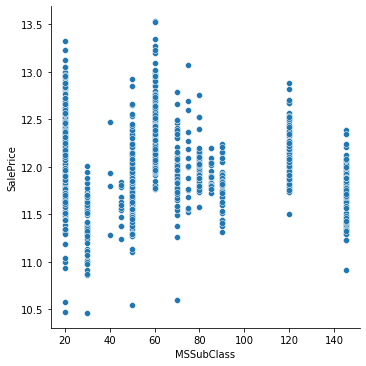

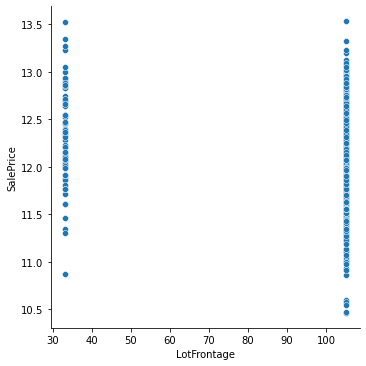

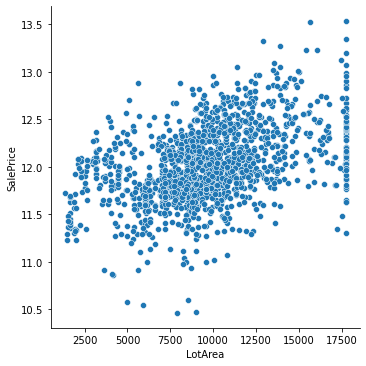

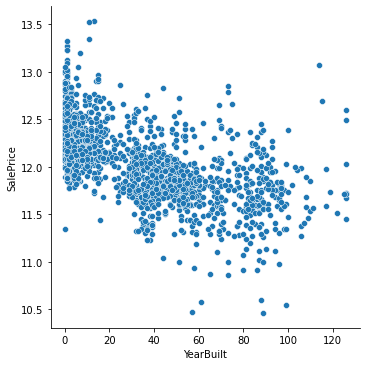

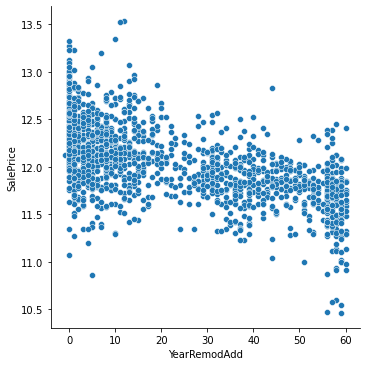

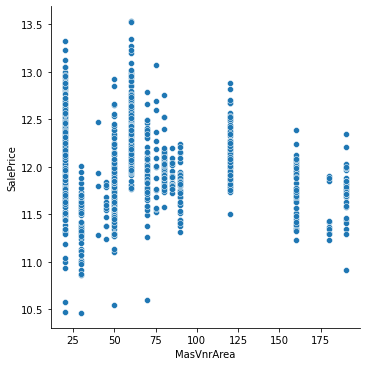

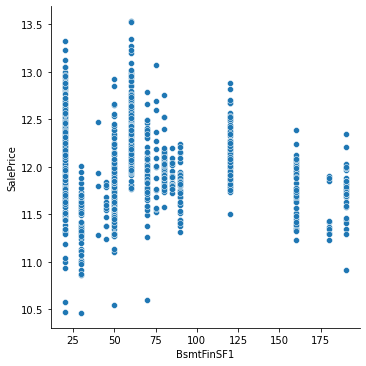

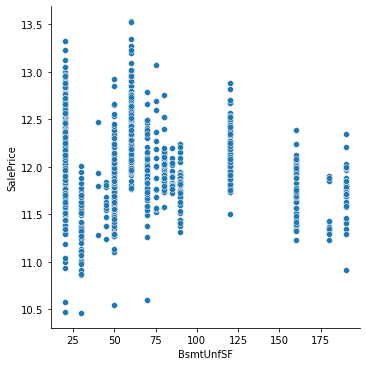

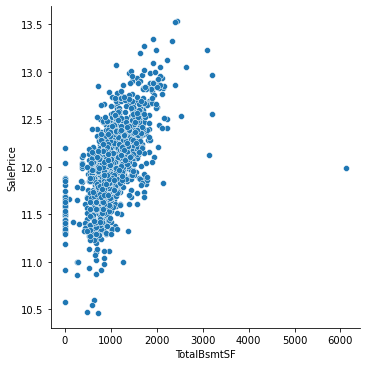

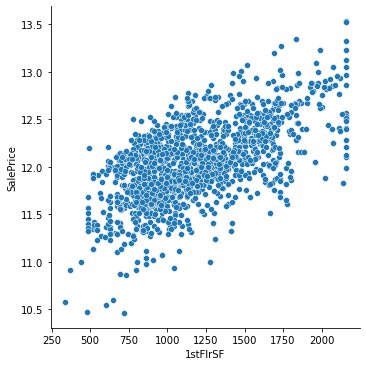

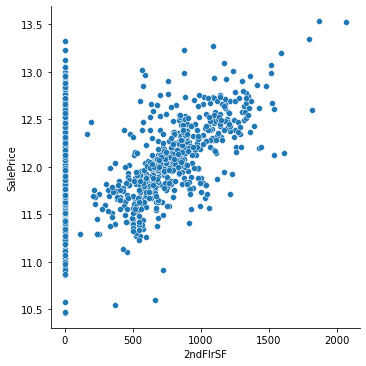

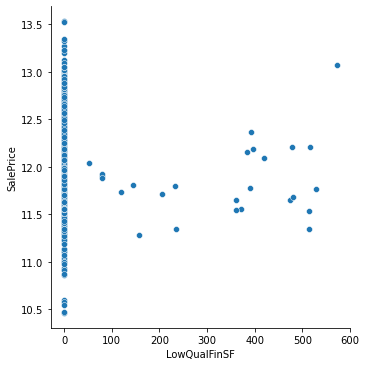

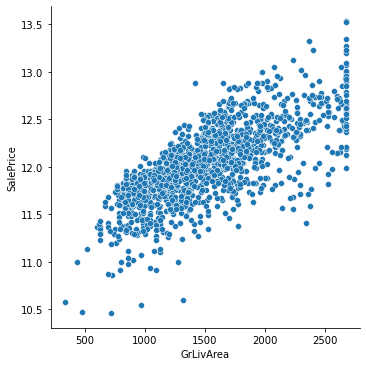

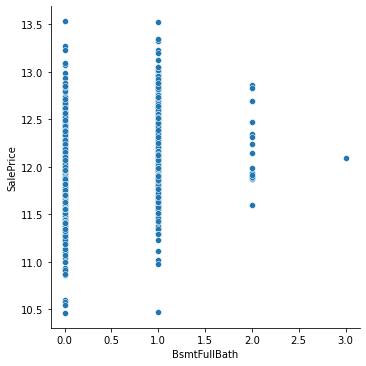

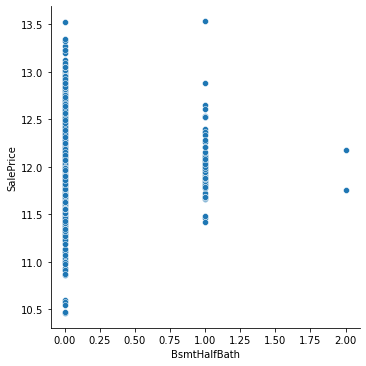

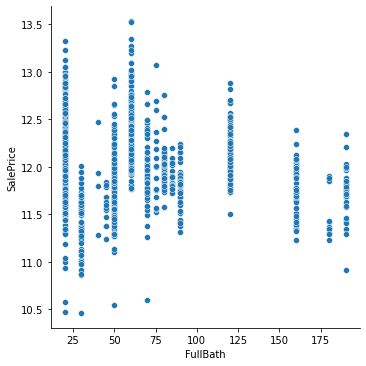

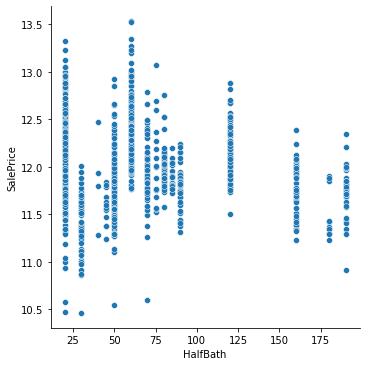

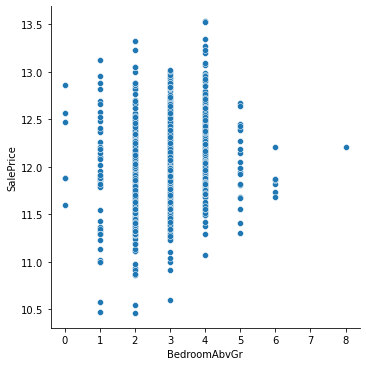

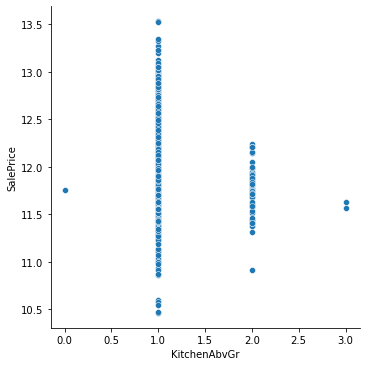

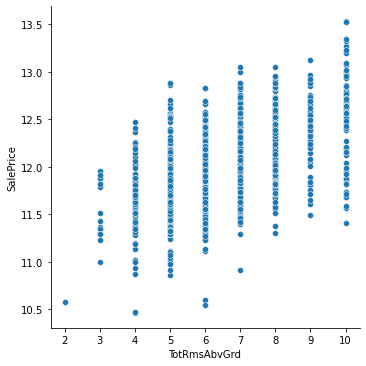

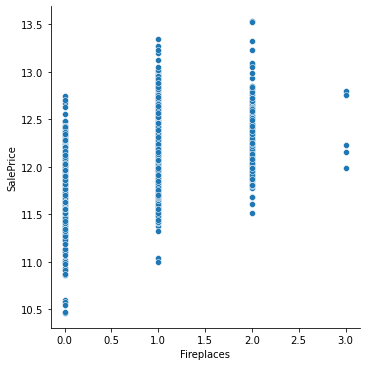

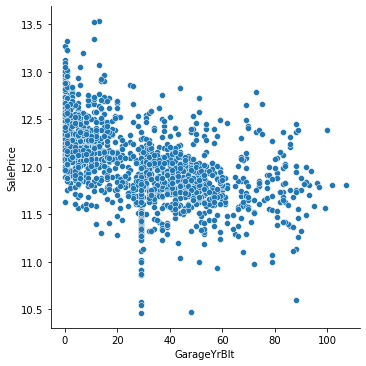

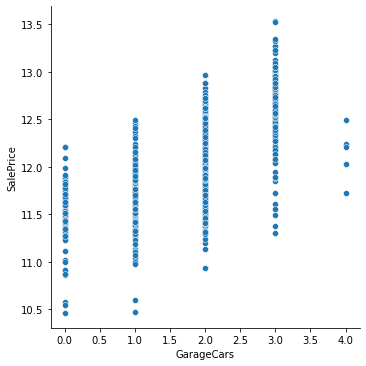

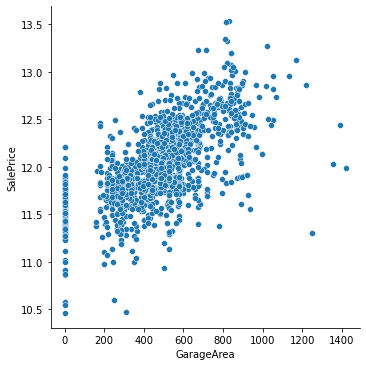

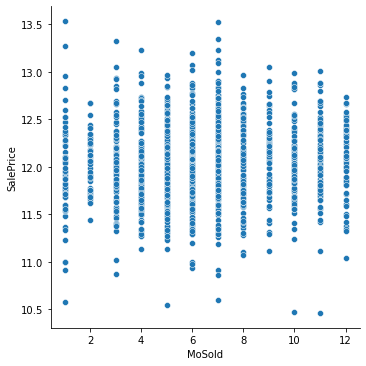

In [199]:
data=numericdata.copy()
for i in data:
    sns.relplot(x=data[i],y=combineddatafinal['SalePrice'])
    
    

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


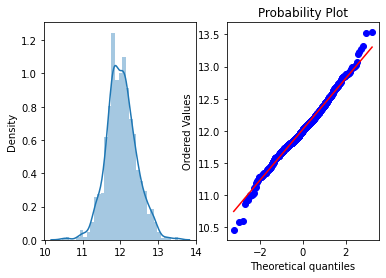

In [154]:
# Checking the dependent variable is normally distributed
np.seterr(divide = 'ignore') 
plt.subplot(121)
import scipy.stats as stats
sns.distplot(x=X_train['SalePrice'])
plt.subplot(122)
stats.probplot(X_train['SalePrice'],plot=plt,dist="norm")
plt.show()

### 2)Homoskedacity 

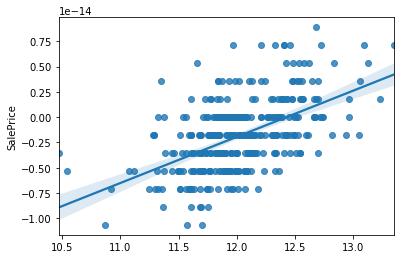

In [155]:
a=sns.regplot(y=residual,x=predict)


### Homoskedacity Evident

### 3) Residuals should be normally distributed

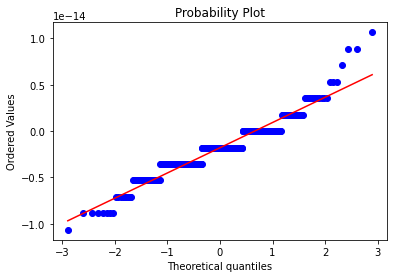

In [204]:
 stats.probplot(residual,fit=False,dist="norm",plot=plt)
plt.show()

## 4)No AutoCorrelation

In [157]:
import numpy as np
from statsmodels.stats.stattools import durbin_watson

In [158]:
a=durbin_watson(residual)

In [159]:
a

1.6090100111234704

###  Cost Function

In [357]:
#Computing Cost Function

In [13]:
def cost_function(train,test):
    n=len(train)
    itr=500
    slope=1
    intercept=0
    for i in range(itr):
        y_pred=slope*train+intercept
        Loss=1/2*n*sum(y_pred-y_actual)
        slope+=1
        intercept+=0.1
        print("Slope:{}  Intercept:{}  Iteration:{}  Loss:{}".format(slope,intercept,i,Loss))
        


In [11]:
x=np.array([10,20,30,40,60])
y=np.array([45,65,27,65,81])

In [18]:
cost_function(train,test)

TypeError: can only concatenate str (not "int") to str

### Gradient Descent

In [15]:
def gradient_descent(x_actual,y_actual):
    itr=1000
    slope=0
    intercept=0
    learning_rate=0.001
    n=len(x)
    for i in range(itr):
        y_pred=slope*x_actual+intercept
        m_deri=-(2/n)*sum(x_actual*(y_actual-y_pred))
        c_deri=-(2/n)*sum(y_actual-y_pred)
        slope=slope-learning_rate*m_deri
        intercept=intercept-learning_rate*c_deri
        print("Slope: {} Intercept : {} Iteration:{}".format(slope,intercept,i))
    
    
    

In [16]:
x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])

In [5]:
import numpy as np

In [17]:
gradient_descent(x,y)

Slope: 0.062 Intercept : 0.018000000000000002 Iteration:0
Slope: 0.122528 Intercept : 0.035592000000000006 Iteration:1
Slope: 0.181618832 Intercept : 0.052785648000000004 Iteration:2
Slope: 0.239306503808 Intercept : 0.069590363712 Iteration:3
Slope: 0.29562421854195203 Intercept : 0.086015343961728 Iteration:4
Slope: 0.35060439367025875 Intercept : 0.10206956796255283 Iteration:5
Slope: 0.40427867960173774 Intercept : 0.11776180246460617 Iteration:6
Slope: 0.4566779778357119 Intercept : 0.13310060678206653 Iteration:7
Slope: 0.5078324586826338 Intercept : 0.14809433770148814 Iteration:8
Slope: 0.5577715785654069 Intercept : 0.16275115427398937 Iteration:9
Slope: 0.606524096911324 Intercept : 0.17707902249404894 Iteration:10
Slope: 0.6541180926443106 Intercept : 0.1910857198675929 Iteration:11
Slope: 0.7005809802869303 Intercept : 0.20477883987199186 Iteration:12
Slope: 0.7459395256813859 Intercept : 0.2181657963105263 Iteration:13
Slope: 0.7902198613385323 Intercept : 0.23125382756381

In [260]:
x=numericaldata.loc[:,'SalePrice']

In [265]:
Y=numericaldata.loc[:,'GarageArea']

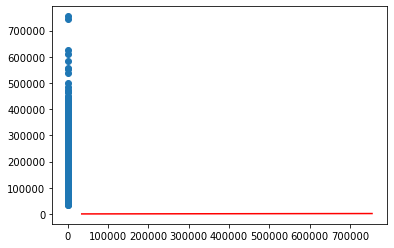

In [271]:
plt.scatter(Y,x)
plt.plot([min(x),max(x)],[min(Y),max(Y)],color="red")

### Ordinary Least squares 

In [310]:
def Ols_method(x,Y):
    itr=1000
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    num=0
    den=0
    for i in range((itr)):
        num=(x[i]-x_mean)*(y[i]-y_mean)
        den=(x[i]-x_mean)**2
        slope=num/den
        intercept=y_mean-slope*(x_mean)
        print("slope: {}  intercept:  {}".format(slope,intercept))

In [311]:
x=numericaldata.loc[:,'SalePrice']

In [312]:
Y=numericaldata.loc[:,'GarageArea']

In [ ]:
Ols_method(x,Y)

In [339]:
y_test

892     11.947949
1105    12.691580
413     11.652687
522     11.976659
1036    12.661914
          ...    
988     12.180755
243     11.695247
1342    12.339291
1057    12.421184
1418    11.728037
Name: SalePrice, Length: 365, dtype: float64

In [315]:
predict

array([11.94794938, 12.69158046, 11.65268741, 11.97665948, 12.66191396,
       11.23188794, 12.64915462, 11.8913619 , 11.34450681, 11.81672692,
       11.88448902, 11.77528973, 11.30220443, 12.27373129, 12.10625231,
       11.80931948, 12.11996995, 11.81303006, 11.681824  , 12.32829028,
       11.9511804 , 12.25486281, 12.06393288, 11.76756768, 12.16525065,
       11.94405832, 12.10699237, 11.85651517, 12.10625231, 12.24961095,
       11.75194237, 12.55672952, 12.20856953, 11.81857024, 12.44901882,
       11.8493977 , 11.83500896, 12.29910751, 12.64432758, 11.48246626,
       11.6483301 , 12.23076526, 11.69107165, 12.4423022 , 11.76368418,
       11.67419361, 11.65268741, 11.75194237, 13.02132683, 11.87756858,
       11.68687877, 12.18586994, 11.65268741, 12.56723749, 11.88103479,
       12.46843691, 12.26904744, 12.07254125, 11.58058411, 11.58524613,
       11.13458902, 11.94470788, 12.66665705, 12.48420426, 12.55483688,
       12.40081672, 11.59910316, 12.62806706, 11.44571672, 12.07

In [324]:
predict_test=model.predict(X_test)

In [183]:
pd.DataFrame(predict).to_csv('Reg.csv')

In [184]:
predict.shape

(1459,)

In [ ]:
predict_final=

(365,)

In [351]:
housetest.head(10)

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,OverallCond,SalePrice
1460,20.0,105.0,11622.0,49.0,49.0,20.0,20.0,20.0,882.0,896.0,...,1,2,4,4,2,8,4,4,4,NaN
1461,20.0,105.0,14267.0,52.0,52.0,20.0,20.0,20.0,1329.0,1329.0,...,1,2,4,4,2,8,4,5,5,NaN
1462,60.0,105.0,13830.0,13.0,12.0,60.0,60.0,60.0,928.0,928.0,...,1,0,4,4,2,8,4,4,4,NaN
1463,60.0,105.0,9978.0,12.0,12.0,60.0,60.0,60.0,926.0,926.0,...,1,0,4,4,2,8,4,5,5,NaN
1464,120.0,105.0,5005.0,18.0,18.0,120.0,120.0,120.0,1280.0,1280.0,...,1,1,4,4,2,8,4,7,7,NaN
1465,60.0,105.0,10000.0,17.0,16.0,60.0,60.0,60.0,763.0,763.0,...,1,0,4,4,2,8,4,5,5,NaN
1466,20.0,105.0,7980.0,18.0,3.0,20.0,20.0,20.0,1168.0,1187.0,...,1,0,4,4,2,8,4,5,5,NaN
1467,60.0,105.0,8402.0,12.0,12.0,60.0,60.0,60.0,789.0,789.0,...,1,0,4,4,2,8,4,5,5,NaN
1468,20.0,105.0,10176.0,20.0,20.0,20.0,20.0,20.0,1300.0,1341.0,...,1,2,4,4,2,8,4,6,6,NaN
1469,20.0,105.0,8400.0,40.0,40.0,20.0,20.0,20.0,882.0,882.0,...,1,0,4,4,2,8,4,3,3,NaN
